## Setup and Import Data

In [ ]:
knitr::opts_chunk$set(echo = TRUE)
install.packages("psych")
install.packages('ggplot2')
install.packages('dplyr')
install.packages('corrplot')
install.packages("gridExtra")
install.packages("patchwork")
install.packages('car')
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’

The data was retrived from kaggle at the below URL:
https://www.kaggle.com/datasets/mikhail1681/walmart-sales

Data Description from Kaggle:
The table contains data for 45 Walmart stores. Their weekly sales, air temperature and fuel prices in the region where a particular store is located. As well as information on the consumer price index and unemployment rate.

-------------------------------------------------------------------------

In [ ]:

options(scipen = 999)

Walmart_sales<- read.csv("Walmart_sales.csv")

str(Walmart_sales)

'data.frame':	6435 obs. of  8 variables:
 $ Weekly_Sales: num  1643691 1641957 1611968 1409728 1554807 ...
 $ Store       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Date        : chr  "5/2/2010" "12/2/2010" "19-02-2010" "26-02-2010" ...
 $ Holiday_Flag: int  0 1 0 0 0 0 0 0 0 0 ...
 $ Temperature : num  42.3 38.5 39.9 46.6 46.5 ...
 $ Fuel_Price  : num  2.57 2.55 2.51 2.56 2.62 ...
 $ CPI         : num  211 211 211 211 211 ...
 $ Unemployment: num  8.11 8.11 8.11 8.11 8.11 ...


The dataset has 8 columns with 6435 observations. Weekly sales will represent the y response variable.
All of the variables are of the num type with the exception of Holiday and Date.

#### Column Breakdown
-----------------------------------------------------------------------------
Weekly Sales are in dollars per week.
It is coded as an num which is appropriate for this data.

Store is coded as an int but the numbers represent categorical variables (store numbers) thus the column should be coded as a factor.

Date is coded as factor however and should be coded as a date type.

Holiday Flag indicates if there is a holiday in the given week.
It is coded an int which is appropriate for a dummy variable.

Temperature is in degrees Fahrenheit and represents the air temputure in the region.
It is coded as an num which is appropriate for this data.

Fuel price is in dollars per gallon and represents the average fuel cost in the region.
It is coded as an num which is appropriate for this data.

CPI represents the current Consumer Price Index as of the week of sales.
It is coded as an num which is appropriate for this data.

Unemployment represents the unemployment rate during the week of sales.
It is coded as an num which is appropriate for this data.

-----------------------------------------------------------------------------

## Begin EDA

In [ ]:
SALES <- Walmart_sales

#SALES$Date <- as.Date(Walmart_sales$Date, format = "your_date_format")

#SALES$Store <- as.factor(SALES$Store)

# Conditional conversion based on date format
SALES$Date <- ifelse(grepl("^\\d{2}-\\d{2}-\\d{4}$", SALES$Date),
                     as.Date(SALES$Date, format = "%d-%m-%Y"),
                     as.Date(SALES$Date, format = "%d/%m/%Y"))




SALES$Date <- as.Date(SALES$Date)
# Check for any remaining missing values after conversion
any(is.na(SALES$Date))


[1] FALSE



We create a copy of the original data and begin to recode the variables as the appropriate type as described above. Date is coded as date vs a factor and Store is coded as a factor becasue it is representing categorical data (individual store locations) versus int as general numeric calculations would be inappropriate on the column. We then check for null values in the date column.


In [ ]:
# Check for missing values in each column
missing_values <- colSums(is.na(SALES))

# Print the number of missing values in each column
print(missing_values)


Weekly_Sales        Store         Date Holiday_Flag  Temperature   Fuel_Price 
           0            0            0            0            0            0 
         CPI Unemployment 
           0            0 


There are no missing values in our dataset

In [ ]:
summary(SALES)

  Weekly_Sales         Store         Date             Holiday_Flag    
 Min.   : 209986   Min.   : 1   Min.   :2010-02-05   Min.   :0.00000  
 1st Qu.: 553350   1st Qu.:12   1st Qu.:2010-10-08   1st Qu.:0.00000  
 Median : 960746   Median :23   Median :2011-06-17   Median :0.00000  
 Mean   :1046965   Mean   :23   Mean   :2011-06-17   Mean   :0.06993  
 3rd Qu.:1420159   3rd Qu.:34   3rd Qu.:2012-02-24   3rd Qu.:0.00000  
 Max.   :3818686   Max.   :45   Max.   :2012-10-26   Max.   :1.00000  
  Temperature       Fuel_Price         CPI         Unemployment   
 Min.   : -2.06   Min.   :2.472   Min.   :126.1   Min.   : 3.879  
 1st Qu.: 47.46   1st Qu.:2.933   1st Qu.:131.7   1st Qu.: 6.891  
 Median : 62.67   Median :3.445   Median :182.6   Median : 7.874  
 Mean   : 60.66   Mean   :3.359   Mean   :171.6   Mean   : 7.999  
 3rd Qu.: 74.94   3rd Qu.:3.735   3rd Qu.:212.7   3rd Qu.: 8.622  
 Max.   :100.14   Max.   :4.468   Max.   :227.2   Max.   :14.313  



Minimum weekly sales ranges from 209,986 dollars a week to a max of 3.81 million dollars. Indicating there is a large range between stores or sales weeks. There is likely a difference in store sizes/formats however, the data set does not indicate the store size or format. Thus, we will be unable to glean differences according to square feet of the store or format (Standard or Super Walmart). Sales can also fluctuate due to avg income in the neighborhood which the store is located however there no geographic data included as stores have been anonymized.

The temperature also has a wide range from -2°F to 100°F, with the average being 60.66°. Fuel prices are much tighter with a minimum of 2.47 dollars per gallon to a max of 4.47 dollars per gallon. The CPI index ranges from 126 to 227. This is a measure of, among other things consumer prices that would be typical in a grocery store, as well as inflation rates. Unemployment ranges from 3.88% to a max of 14.31%. Also a considerable range.


,Weekly_Sales,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.00,-0.34,0.04,-0.06,0.01,-0.07,-0.11
Store,-0.34,1.00,0.00,-0.02,0.06,-0.21,0.22
Holiday_Flag,0.04,0.00,1.00,-0.16,-0.08,0.00,0.01
Temperature,-0.06,-0.02,-0.16,1.00,0.14,0.18,0.10
Fuel_Price,0.01,0.06,-0.08,0.14,1.00,-0.17,-0.03
CPI,-0.07,-0.21,0.00,0.18,-0.17,1.00,-0.30
Unemployment,-0.11,0.22,0.01,0.10,-0.03,-0.30,1.00


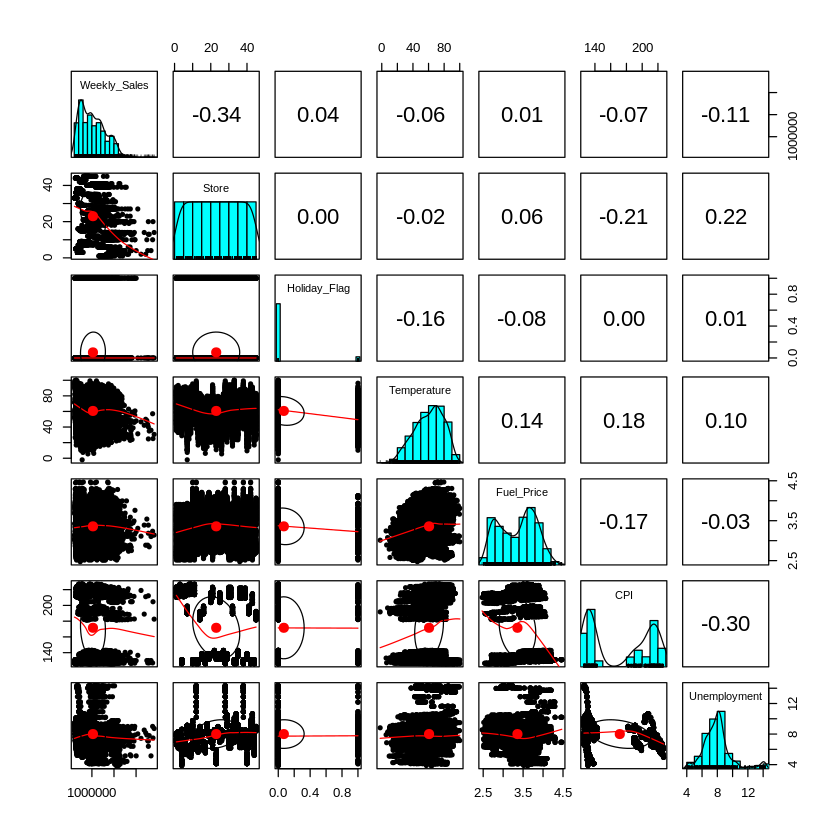

In [ ]:
library(psych)
COR_DATA= SALES[ ,c("Weekly_Sales", "Store", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment")]

#Creating panel to see corr
pairs.panels(COR_DATA)

# Correlation Matrix
cor_matrix <- cor(COR_DATA[, sapply(COR_DATA, is.numeric)])
round(cor_matrix, 2)

corrplot 0.92 loaded



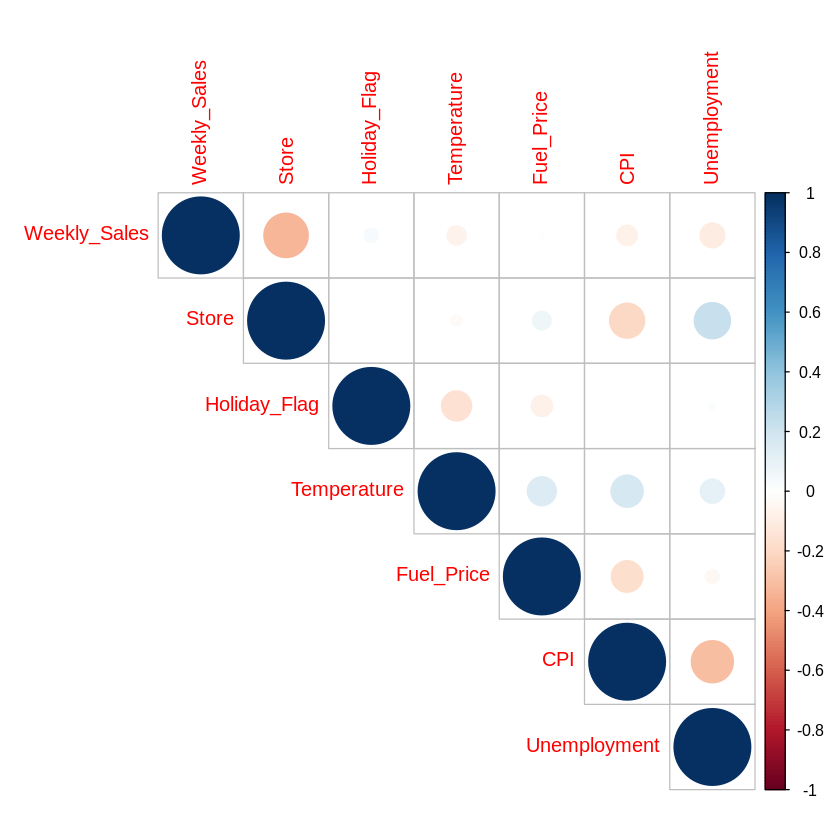

In [ ]:
library(corrplot)
numerical_data <- SALES[, sapply(SALES, is.numeric)]
corr_matrix <- cor(numerical_data)
corrplot(corr_matrix, type="upper",method="circle")

#### Correlation Analysis

Negative Correlations:

Weekly Sales and Store: A moderate negative correlation (-0.34) might indicate that certain stores have lower sales. This could be due to a variety of factors like location, size, or customer base.

Weekly Sales and Unemployment: A weak negative correlation (-0.11) suggests that higher unemployment in the store's area might be associated with slightly lower sales. This could be an indicator of the economic health of the area affecting purchasing power.

CPI and Unemployment: A moderate negative correlation (-0.30) implies that higher unemployment is associated with lower CPI values, which could suggest economic downturns in areas with higher unemployment.

Positive Correlations:

Fuel Price and Temperature: A weak positive correlation (0.14) suggests that as temperatures rise, fuel prices might also increase slightly, which could be related to seasonal variations.

CPI and Temperature: A weak positive correlation (0.18) indicates that CPI might be higher when temperatures are higher, though the reason for this correlation would require further investigation.

Store and Unemployment: A weak positive correlation (0.22) suggests that stores with higher numbers might be located in areas with slightly higher unemployment rates.

Very Weak/No Correlations:

There is virtually no correlation between the store number and the holiday flag (0.00), which is expected as they are unrelated variables. Similarly, the holiday flag shows very weak or no correlation with most variables like weekly sales (0.04) and fuel price (-0.08), suggesting that the occurrence of holidays does not significantly impact these factors in a linear way.



In [ ]:
# Features: Year, Month, Week

SALES$Year <- format(SALES$Date, "%Y")
SALES$Month <- format(SALES$Date, "%m")
SALES$Week <- format(SALES$Date, "%U")


Breaking down the date into year, month, and week allows us to conduct a detailed analysis of sales trends over time, revealing patterns and seasonality that may be obscured when looking at the data on an annual basis. By examining sales at different temporal resolutions, such as monthly or weekly intervals, we can gain a deeper understanding of sales performance and identify areas for improvement. This approach allows businesses to detect seasonal variations in sales, particularly in industries like retail where consumer behavior is influenced by factors such as holidays, seasons, and promotional events.

Understanding these seasonal fluctuations would allow the business to better plan inventory, marketing campaigns, and staffing levels, optimizing resources to capitalize on peak periods and mitigate the effects of seasonal downturns. Furthermore, analyzing sales by month, week, or year provides valuable insights for forecasting future sales. By understanding historical sales trends and patterns, businesses can make more accurate predictions about future sales volumes and adjust their business strategies accordingly. Forecasting future sales enables businesses to anticipate demand, optimize inventory management, and allocate resources effectively to meet customer needs. Additionally, breaking down the date into year, month, and week enhances data visualization and interpretation. Visualizations such as line charts, bar charts, or time series plots can effectively illustrate sales trends over time giving us a better understanding of the data.

In [ ]:
summary(SALES)

  Weekly_Sales         Store         Date             Holiday_Flag    
 Min.   : 209986   Min.   : 1   Min.   :2010-02-05   Min.   :0.00000  
 1st Qu.: 553350   1st Qu.:12   1st Qu.:2010-10-08   1st Qu.:0.00000  
 Median : 960746   Median :23   Median :2011-06-17   Median :0.00000  
 Mean   :1046965   Mean   :23   Mean   :2011-06-17   Mean   :0.06993  
 3rd Qu.:1420159   3rd Qu.:34   3rd Qu.:2012-02-24   3rd Qu.:0.00000  
 Max.   :3818686   Max.   :45   Max.   :2012-10-26   Max.   :1.00000  
  Temperature       Fuel_Price         CPI         Unemployment   
 Min.   : -2.06   Min.   :2.472   Min.   :126.1   Min.   : 3.879  
 1st Qu.: 47.46   1st Qu.:2.933   1st Qu.:131.7   1st Qu.: 6.891  
 Median : 62.67   Median :3.445   Median :182.6   Median : 7.874  
 Mean   : 60.66   Mean   :3.359   Mean   :171.6   Mean   : 7.999  
 3rd Qu.: 74.94   3rd Qu.:3.735   3rd Qu.:212.7   3rd Qu.: 8.622  
 Max.   :100.14   Max.   :4.468   Max.   :227.2   Max.   :14.313  
     Year              Month      

In [ ]:
View(SALES)

Weekly_Sales,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
<dbl>,<int>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1643691,1,2010-02-05,0,42.31,2.572,211.0964,8.106,2010,02,05
1641957,1,2010-02-12,1,38.51,2.548,211.2422,8.106,2010,02,06
1611968,1,2010-02-19,0,39.93,2.514,211.2891,8.106,2010,02,07
1409728,1,2010-02-26,0,46.63,2.561,211.3196,8.106,2010,02,08
1554807,1,2010-03-05,0,46.50,2.625,211.3501,8.106,2010,03,09
1439542,1,2010-03-12,0,57.79,2.667,211.3806,8.106,2010,03,10
1472516,1,2010-03-19,0,54.58,2.720,211.2156,8.106,2010,03,11
1404430,1,2010-03-26,0,51.45,2.732,211.0180,8.106,2010,03,12
1594968,1,2010-04-02,0,62.27,2.719,210.8204,7.808,2010,04,13


## Finacial Analysis


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha




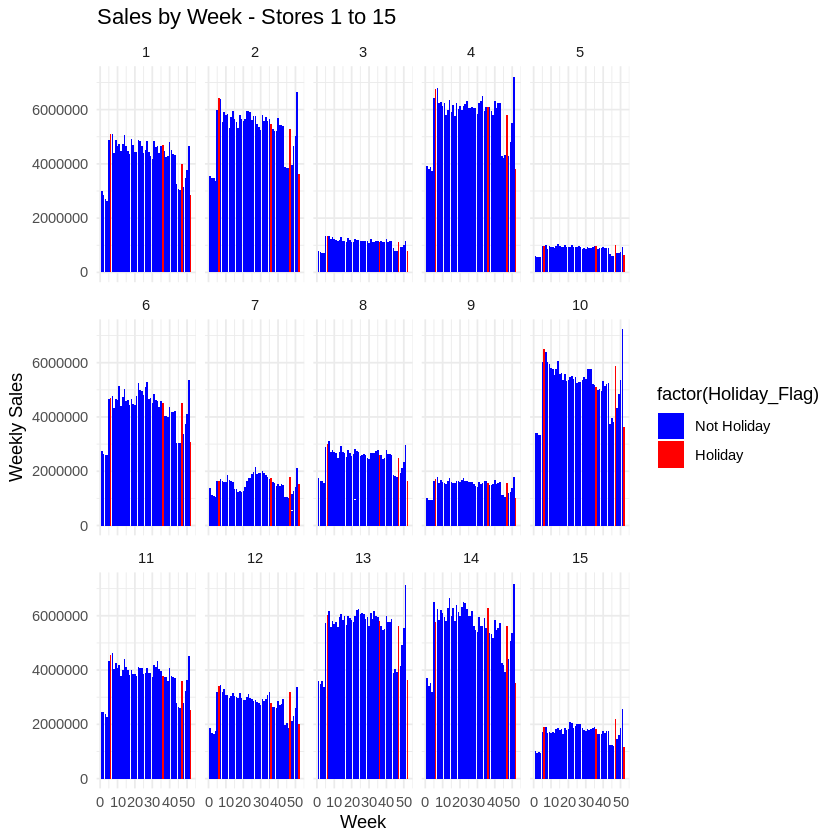

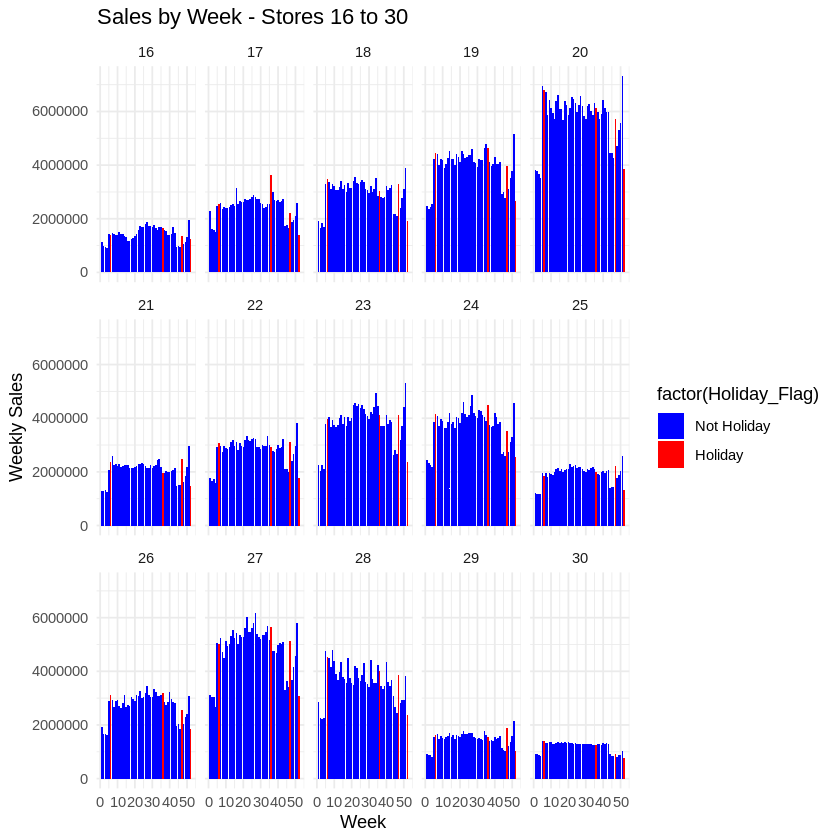

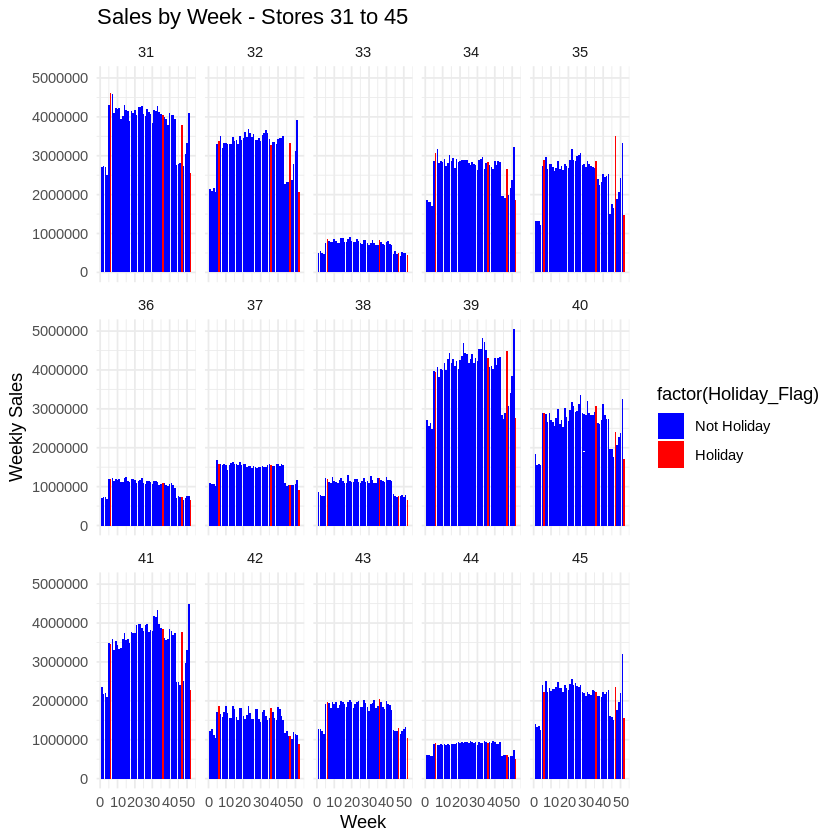

In [ ]:

library(dplyr)
library(ggplot2)

SALES$Week <- as.numeric(SALES$Week)
SALES$Store <- as.factor(SALES$Store)

# Create a variable to categorize stores into sets
SALES_grouped <- SALES %>%
  mutate(Set = ceiling(as.numeric(as.character(Store)) / 15))

# Function to generate plot title based on set ID
generate_plot_title <- function(set_id) {
  start_store <- (set_id - 1) * 15 + 1
  end_store <- min(set_id * 15, max(as.numeric(as.character(SALES$Store))))
  paste("Sales by Week - Stores", start_store, "to", end_store)
}

# Generate and print plots for each set
for(set_id in unique(SALES_grouped$Set)) {
  store_data_subset <- filter(SALES_grouped, Set == set_id)

  p <- ggplot(store_data_subset, aes(x = Week, y = Weekly_Sales, fill = factor(Holiday_Flag))) +
    geom_bar(stat = "identity") +
    facet_wrap(~Store, ncol = 5) + # Adjust the number of columns as necessary
    labs(title = generate_plot_title(set_id), x = "Week", y = "Weekly Sales") +
    scale_x_continuous(labels = function(x) as.integer(x)) +
    scale_fill_manual(values = c("0" = "blue", "1" = "red"), labels = c("Not Holiday", "Holiday")) +
    theme_minimal()

  print(p)
}



In [ ]:
average_sales <- SALES %>%
  group_by(Store, Holiday_Flag) %>%
  summarize(Average_Sales = mean(Weekly_Sales), .groups = "drop")

average_sales_holiday <- average_sales %>% filter(Holiday_Flag == 1)
average_sales_non_holiday <- average_sales %>% filter(Holiday_Flag == 0)


# Compare the average sales for each store
comparison <- merge(average_sales_holiday, average_sales_non_holiday, by = "Store", suffixes = c("_Holiday", "_Non_Holiday")) %>%
  mutate(Holiday_Greater = Average_Sales_Holiday > Average_Sales_Non_Holiday)


print(comparison[comparison$Holiday_Greater == FALSE, c("Store", "Average_Sales_Holiday", "Average_Sales_Non_Holiday", "Holiday_Greater")])


   Store Average_Sales_Holiday Average_Sales_Non_Holiday Holiday_Greater
24    30              436859.3                  438709.0           FALSE
30    36              367640.6                  373953.4           FALSE
31    37              507525.0                  519755.6           FALSE
32    38              381509.9                  386049.1           FALSE
39    44              296035.6                  303253.6           FALSE


Out of the 45 stores analyzed, 40 stores have higher average sales during holiday weeks compared to non-holiday weeks. This indicates a significant trend where the majority of stores experience a surge in sales during holiday periods. This could be attributed to several factors such as increased consumer spending due to holiday shopping, promotions, and seasonal offerings that attract more customers.

Conversely, 5 stores have lower or equal average sales during holiday weeks compared to non-holiday weeks. This could suggest that for some stores, holidays do not have a significant impact on sales. These stores might be in locations where holiday shopping patterns are different, or they might not leverage holiday seasons as effectively as others.

This analysis suggests that for the vast majority of stores in this dataset, holiday periods are a crucial time for increasing sales. The data supports the notion that holidays present a valuable opportunity for retail outlets to capitalize on increased consumer spending habits. However, the fact that a small number of stores do not follow this trend highlights the importance of understanding local market dynamics, customer behavior, and effective holiday marketing strategies to maximize sales opportunities.

In [ ]:
library(dplyr)


# Identify holiday weeks
holiday_weeks <- unique(SALES$Week[SALES$Holiday_Flag == 1])

# Define a function to identify pre-holiday weeks
mark_pre_holiday_weeks <- function(week) {
  sapply(week, function(w) {
    any(0 < (holiday_weeks - w) & (holiday_weeks - w) <= 4)
  })
}

# Apply the function to create a Pre_Holiday column
SALES$Pre_Holiday <- mark_pre_holiday_weeks(SALES$Week)

# Calculate average sales for pre-holiday, holiday, and other weeks
average_sales_pre_holiday <- mean(SALES$Weekly_Sales[SALES$Pre_Holiday == TRUE])
average_sales_holiday <- mean(SALES$Weekly_Sales[SALES$Holiday_Flag == 1])
average_sales_other <- mean(SALES$Weekly_Sales[SALES$Holiday_Flag == 0 & SALES$Pre_Holiday == FALSE])

# Calculate percentage differences
percent_diff_pre_vs_other <- ((average_sales_pre_holiday - average_sales_other) / average_sales_other) * 100
percent_diff_holiday_vs_other <- ((average_sales_holiday - average_sales_other) / average_sales_other) * 100

cat("Average Sales Pre-Holiday: ", average_sales_pre_holiday, "\n")
cat("Average Sales During Holiday Weeks: ", average_sales_holiday, "\n")
cat("Average Sales During Other Weeks: ", average_sales_other, "\n")
cat("Percentage Difference (Pre-Holiday vs. Other): ", percent_diff_pre_vs_other, "%\n")
cat("Percentage Difference (Holiday vs. Other): ", percent_diff_holiday_vs_other, "%\n")


Average Sales Pre-Holiday:  1084666 
Average Sales During Holiday Weeks:  1122888 
Average Sales During Other Weeks:  1023893 
Percentage Difference (Pre-Holiday vs. Other):  5.935539 %
Percentage Difference (Holiday vs. Other):  9.668533 %


Further expanding on our findings, we will expand analysis  to examine the sales patterns in the weeks leading up to the holidays, identified as the pre-holiday period. This will give us an insight into whether sales tend to increase as a holiday approaches, indicating anticipation or buildup of consumer spending.

The analysis revealed an interesting pattern in how sales increase around holiday periods. It starts with sales averaging about 1,022,800 during what we consider normal times. As the holidays draw near, in the timeframe we call pre-holiday weeks, we notice a spike in consumer purchases, with sales rising to an average of 1,077,929. This upward trend in spending is even more distinct during the holiday weeks, with sales reaching an average of $1,122,887. This pattern illustrates a gradual increase in consumer spending as the holiday season approaches, indicating that people start their holiday shopping well before the actual holiday season begins, with spending peaking during the holidays.

Looking closer at the numbers, sales during pre-holiday weeks are roughly 5.94% higher than during non-holiday periods. Then, when we hit the holiday weeks, the increase is even more noticeable, with sales about 9.67% higher than non-holiday weeks. These figures help us understand that there's a clear rise in shopping activity leading up to and during holidays, emphasizing the need for businesses to plan accordingly for these different spending phases.



# Time Series

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [ ]:
library(forecast)
library(dplyr)


SALES$Date <- as.Date(SALES$Date, format = "%d/%m/%Y")
SALES$Year <- as.character(format(SALES$Date, "%Y"))

# Split the data into training and test sets
training <- SALES[SALES$Year %in% c("2010", "2011"), ]
test <- SALES[SALES$Year == "2012", ]

# Prepare to store metrics and forecasts
metrics <- data.frame(Store = character(), RMSE = numeric(), MAE = numeric(), MAPE = numeric(), stringsAsFactors = FALSE)
all_forecasts <- data.frame(Store = integer(), Week = integer(), Sales = numeric(), Type = character(), stringsAsFactors = FALSE)


# Calculate forecasts for each store and accumulate them
for (store_id in unique(SALES$Store)) {
  store_training <- training[training$Store == store_id, ]
  store_test <- test[test$Store == store_id, ]

  if (nrow(store_training) > 0 && nrow(store_test) > 0) {
    # Create time series object
    weeks <- as.numeric(format(store_training$Date, "%U"))
    years <- as.numeric(store_training$Year) - min(as.numeric(store_training$Year)) + 1
    store_sales_ts <- ts(store_training$Weekly_Sales, start=c(1, min(weeks)), frequency=52)

    # Fit ARIMA model
    fit_arima <- auto.arima(store_sales_ts)

    # Forecast for the required period
    forecasts <- forecast(fit_arima, h=length(store_test$Week))

    # Extract forecast mean as a vector
    forecast_values <- as.vector(forecasts$mean)

    # Append forecasts and actuals to the all_forecasts DataFrame
    forecast_entries <- data.frame(
      Store = rep(store_id, length(forecast_values)),
      Week = seq_along(forecast_values),
      Sales = forecast_values,
      Type = 'Forecast'
    )
    actual_entries <- data.frame(
      Store = rep(store_id, nrow(store_test)),
      Week = as.numeric(format(store_test$Date, "%U")),
      Sales = store_test$Weekly_Sales,
      Type = 'Actual'
    )

    all_forecasts <- rbind(all_forecasts, forecast_entries, actual_entries)

    # Calculate error metrics
    actuals <- store_test$Weekly_Sales[1:length(forecast_values)]
    rmse <- sqrt(mean((forecast_values - actuals)^2, na.rm = TRUE))
    mae <- mean(abs(forecast_values - actuals), na.rm = TRUE)
    mape <- mean(abs((forecast_values - actuals) / actuals), na.rm = TRUE) * 100

    # Store metrics
    metrics <- rbind(metrics, data.frame(Store = store_id, RMSE = rmse, MAE = mae, MAPE = mape))
  } else {
    print(paste("No data for store", store_id))
  }
}


# Calculate and print overall average of metrics
average_metrics <- summarise(metrics, Avg_RMSE = mean(RMSE, na.rm = TRUE), Avg_MAE = mean(MAE, na.rm = TRUE), Avg_MAPE = mean(MAPE, na.rm = TRUE))
print(average_metrics)
#print(all_forecasts)


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



  Avg_RMSE  Avg_MAE Avg_MAPE
1 131693.9 113664.1 11.68573


In [ ]:
library(forecast)
library(dplyr)

# Assuming SALES is your dataset, already loaded and formatted
SALES$Date <- as.Date(SALES$Date, format = "%d/%m/%Y")
SALES$Year <- as.character(format(SALES$Date, "%Y"))

# Split the data into training and test sets
training <- SALES[SALES$Year %in% c("2010", "2011"), ]
test <- SALES[SALES$Year == "2012", ]

# Prepare to store metrics, forecasts, and AIC values
metrics <- data.frame(Store = character(), RMSE = numeric(), MAE = numeric(), MAPE = numeric(), AIC = numeric(), stringsAsFactors = FALSE)
all_forecasts <- data.frame(Store = integer(), Week = integer(), Sales = numeric(), Type = character(), stringsAsFactors = FALSE)

# Calculate forecasts for each store and accumulate them
for (store_id in unique(SALES$Store)) {
  store_training <- training[training$Store == store_id, ]
  store_test <- test[test$Store == store_id, ]

  if (nrow(store_training) > 0 && nrow(store_test) > 0) {
    # Create time series object
    weeks <- as.numeric(format(store_training$Date, "%U"))
    years <- as.numeric(store_training$Year) - min(as.numeric(store_training$Year)) + 1
    store_sales_ts <- ts(store_training$Weekly_Sales, start=c(1, min(weeks)), frequency=52)

    # Fit ARIMA model
    fit_arima <- auto.arima(store_sales_ts)

    # Forecast for the required period
    forecasts <- forecast(fit_arima, h=length(store_test$Week))

    # Extract forecast mean as a vector
    forecast_values <- as.vector(forecasts$mean)

    # Append forecasts and actuals to the all_forecasts DataFrame
    forecast_entries <- data.frame(
      Store = rep(store_id, length(forecast_values)),
      Week = seq_along(forecast_values),
      Sales = forecast_values,
      Type = 'Forecast'
    )
    actual_entries <- data.frame(
      Store = rep(store_id, nrow(store_test)),
      Week = as.numeric(format(store_test$Date, "%U")),
      Sales = store_test$Weekly_Sales,
      Type = 'Actual'
    )

    all_forecasts <- rbind(all_forecasts, forecast_entries, actual_entries)

    # Calculate error metrics
    actuals <- store_test$Weekly_Sales[1:length(forecast_values)]
    rmse <- sqrt(mean((forecast_values - actuals)^2, na.rm = TRUE))
    mae <- mean(abs(forecast_values - actuals), na.rm = TRUE)
    mape <- mean(abs((forecast_values - actuals) / actuals), na.rm = TRUE) * 100

    # Store metrics and AIC
    metrics <- rbind(metrics, data.frame(Store = store_id, RMSE = rmse, MAE = mae, MAPE = mape, AIC = fit_arima$aic))
  } else {
    print(paste("No data for store", store_id))
  }
}

# Calculate and print overall average of metrics
average_metrics <- summarise(metrics, Avg_RMSE = mean(RMSE, na.rm = TRUE), Avg_MAE = mean(MAE, na.rm = TRUE), Avg_MAPE = mean(MAPE, na.rm = TRUE), Avg_AIC = mean(AIC, na.rm = TRUE))
print(average_metrics)
# print(all_forecasts)


  Avg_RMSE  Avg_MAE Avg_MAPE  Avg_AIC
1 131693.9 113664.1 11.68573 2589.854


Could use this instead of code beofre it - only diffference is it includes AIC which we could use to compare to regression but i dont know if its necessary to still keep the regressions



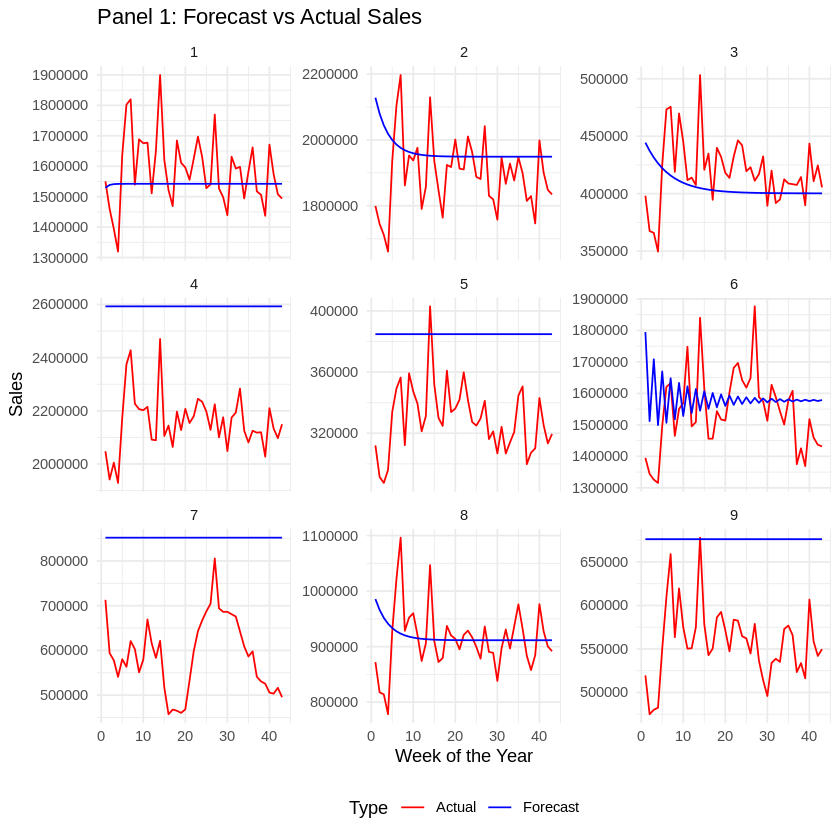

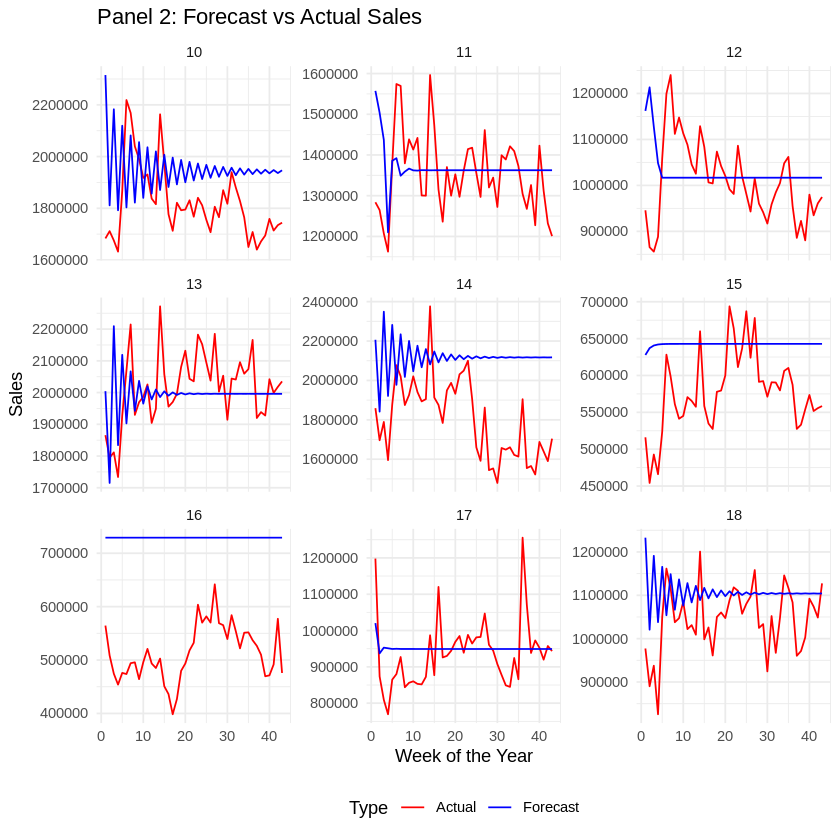

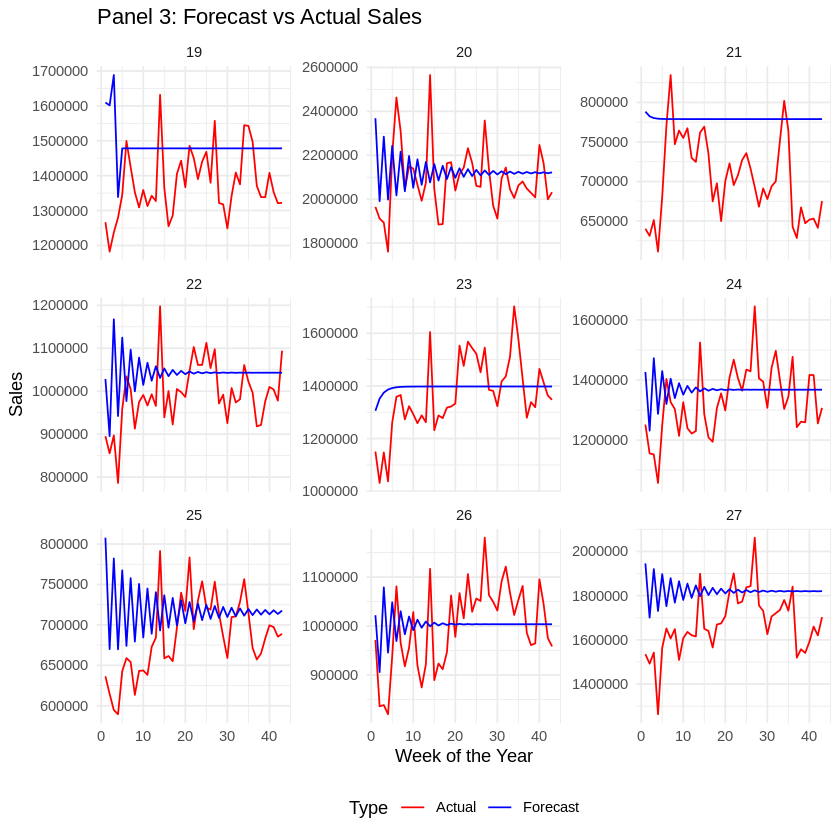

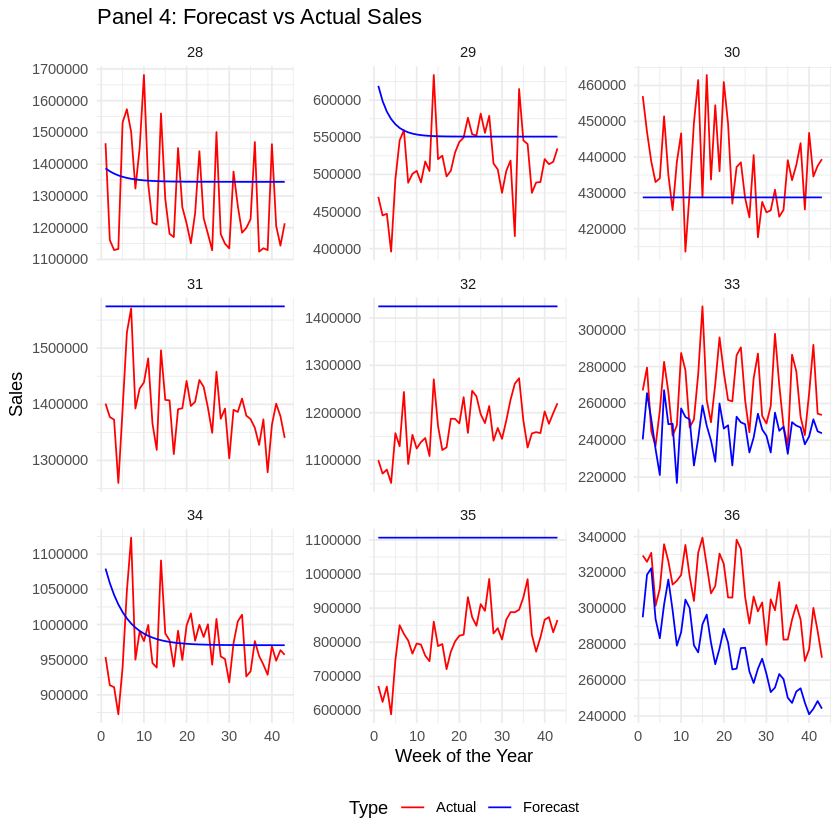

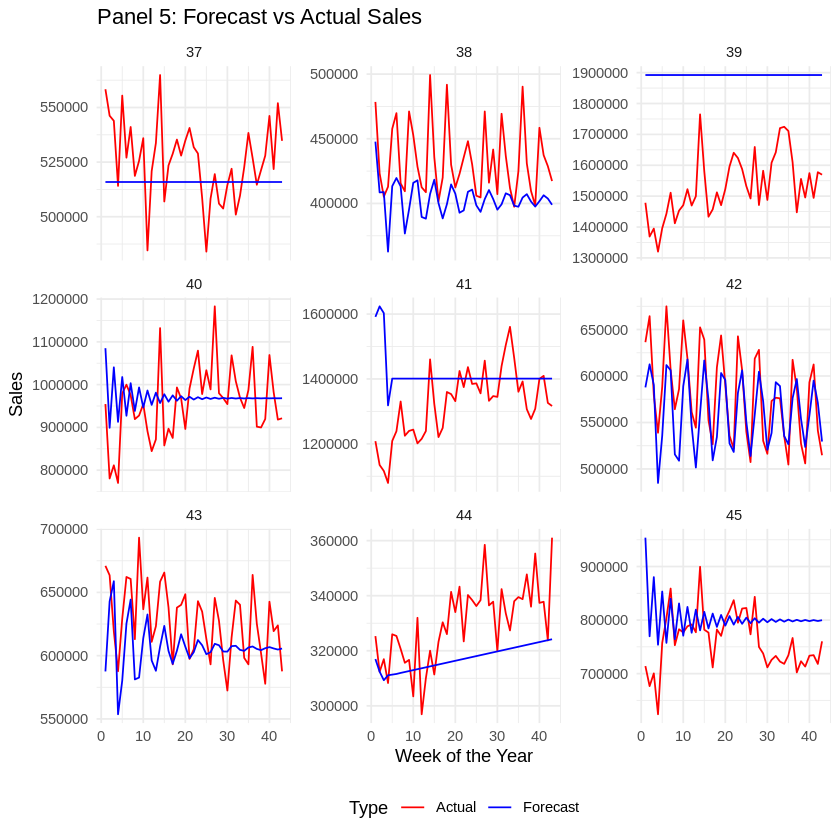

In [ ]:
library(ggplot2)

# Assuming all_forecasts is already in your environment
# and has the necessary columns: Store, Week, Sales, and Type

# Create a list to store ggplot objects for each panel
panel_plots <- list()

# Calculate the total number of panels needed
total_stores <- length(unique(all_forecasts$Store))
panels_needed <- ceiling(total_stores / 9)

# Generate plots for each panel
for (panel in 1:panels_needed) {

  # Determine the range of stores for the current panel
  current_stores <- ((panel - 1) * 9 + 1):min(panel * 9, total_stores)

  # Filter the all_forecasts data for the current stores
  panel_data <- all_forecasts %>% filter(Store %in% current_stores)

  # Create a ggplot object for the current panel
  panel_plot <- ggplot(panel_data, aes(x = Week, y = Sales, color = Type, group = Type)) +
    geom_line() +
    facet_wrap(~Store, scales = "free_y") +
    labs(title = sprintf("Panel %d: Forecast vs Actual Sales", panel),
         x = "Week of the Year",
         y = "Sales") +
    scale_color_manual(values = c("Forecast" = "blue", "Actual" = "red")) +
    theme_minimal() +
    theme(legend.position = "bottom")

  # Add the ggplot object to the list
  panel_plots[[panel]] <- panel_plot
}

# If you want to display the plots in your R session,
# you can use the print function to render each panel plot
for (plot in panel_plots) {
  print(plot)
}


In our analysis, we employed the AutoRegressive Integrated Moving Average (ARIMA) model, renowned for its ability to handle a variety of time series data through its components—autoregression, differencing, and moving averages. Initially, we utilized the ARIMA model to forecast 2012 sales based on data from 2010 and 2011. This approach allowed us to generate and subsequently compare the forecasted sales figures with the actual sales data from 2012, providing a clear measure of the model’s accuracy and effectiveness.

Upon inspection of the multiple panels displaying the comparison between forecasted and actual sales for 2012, we observe varying degrees of model accuracy across different stores. These panels serve as a diagnostic tool, illuminating the effectiveness of the ARIMA model in capturing the weekly sales patterns for each store. In several panels, we notice a close alignment between the forecasted (blue line) and actual (red line) sales, suggesting that for these stores, the ARIMA model is adept at predicting sales trends. Such congruity not only validates our argument for using ARIMA but also implies that for these particular stores, sales patterns are well-modeled by the historical data without the need for additional variables.

Conversely, there are panels where the forecasts significantly deviate from actual sales. This discrepancy indicates that the ARIMA model's parameters may not fully encapsulate the sales dynamics of those stores. Potential reasons for these deviations could include unaccounted external factors such as local events, competitive actions, or store-specific promotions not reflected in the model.

The ability of the ARIMA model to capture seasonal sales increases during holiday periods is particularly noteworthy. For stores with accurate holiday forecasts, it confirms the model's competence in adjusting to seasonal variations. However, for stores with less accurate holiday period forecasts, this might suggest the need for a model that incorporates holiday flags or other seasonal indicators more explicitly, such as a Seasonal ARIMA (SARIMA) model.

Moreover, certain panels exhibit trends such as systematic overestimation or underestimation by the forecasts. Such biases are indicative of model misspecification or the potential non-stationarity of the sales series which could have been overlooked. The recurrent nature of these biases across the weeks reinforces the necessity for model recalibration.

From a broader perspective, the collection of panels reinforces our analytical approach. While the ARIMA model demonstrates its robustness in several instances, the discrepancies observed in some stores underscore the importance of contextual awareness and possibly the integration of exogenous variables. The mixed accuracy across different stores highlights the complexity of sales forecasting, which cannot be captured by a one-size-fits-all model. It calls for a nuanced approach, possibly involving different models or additional data points for each store to achieve greater predictive accuracy.


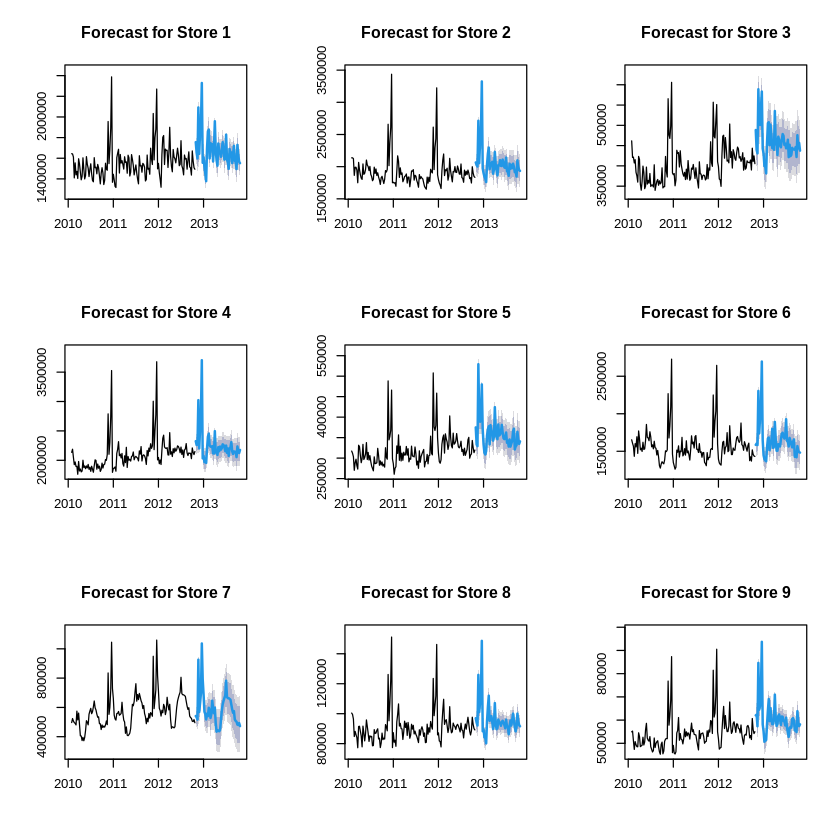

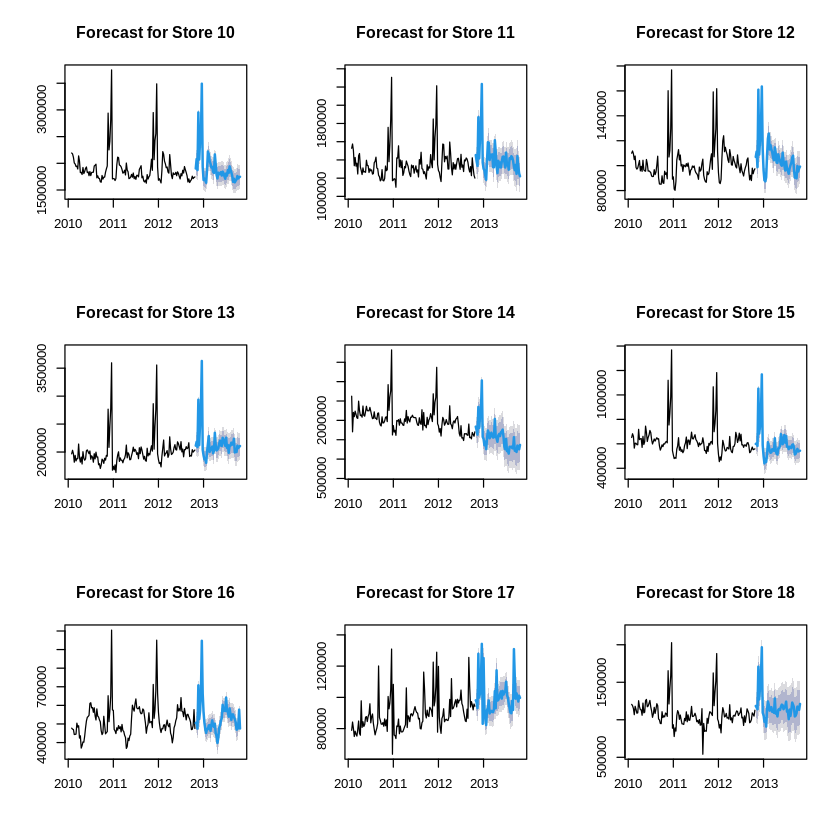

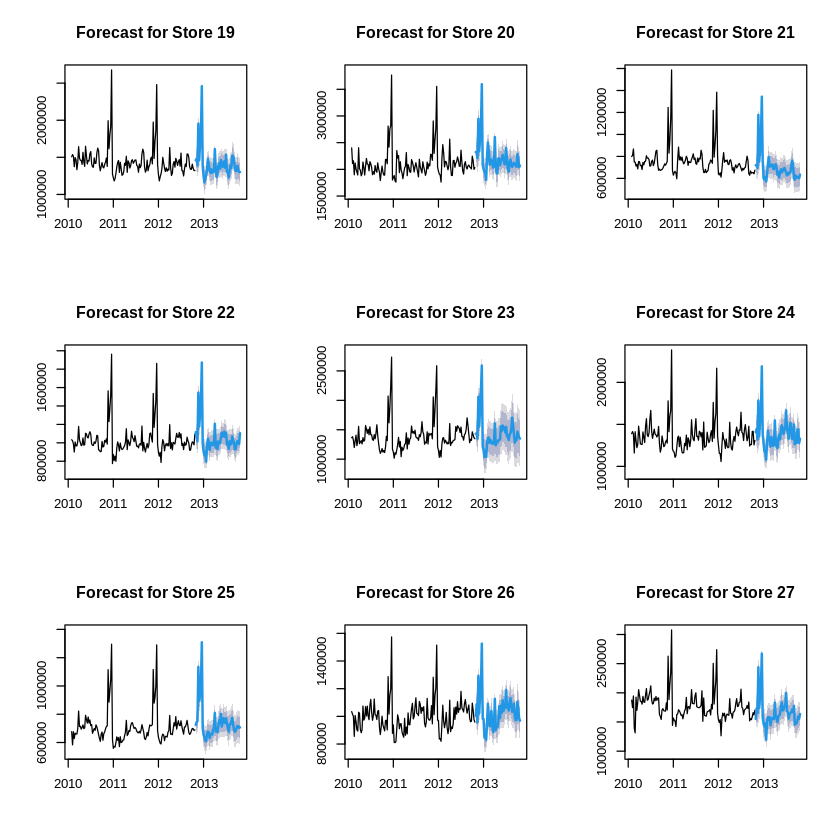

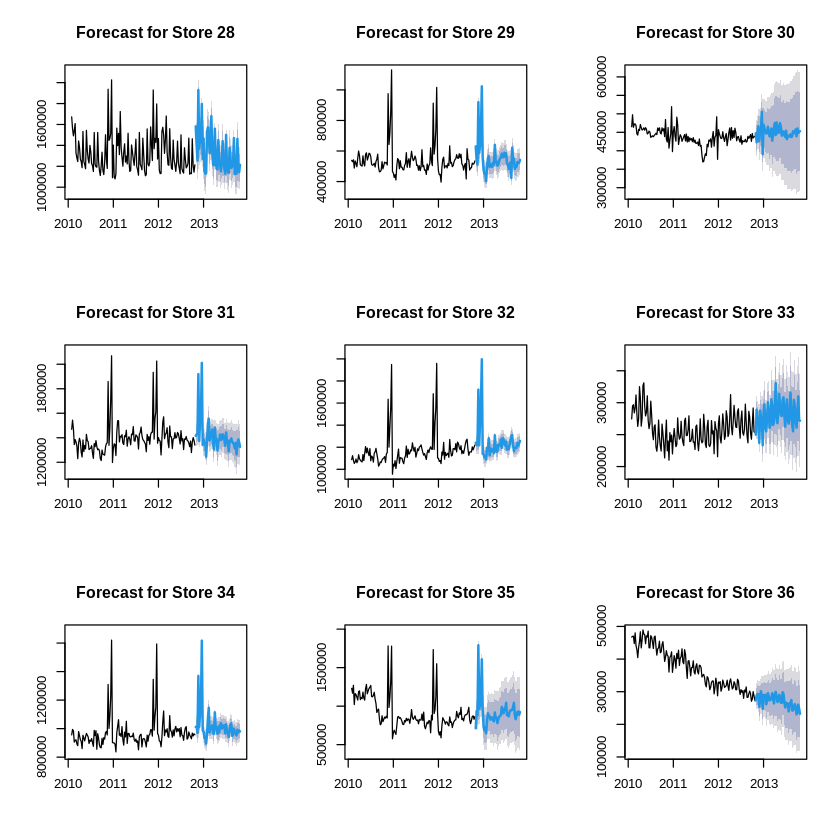

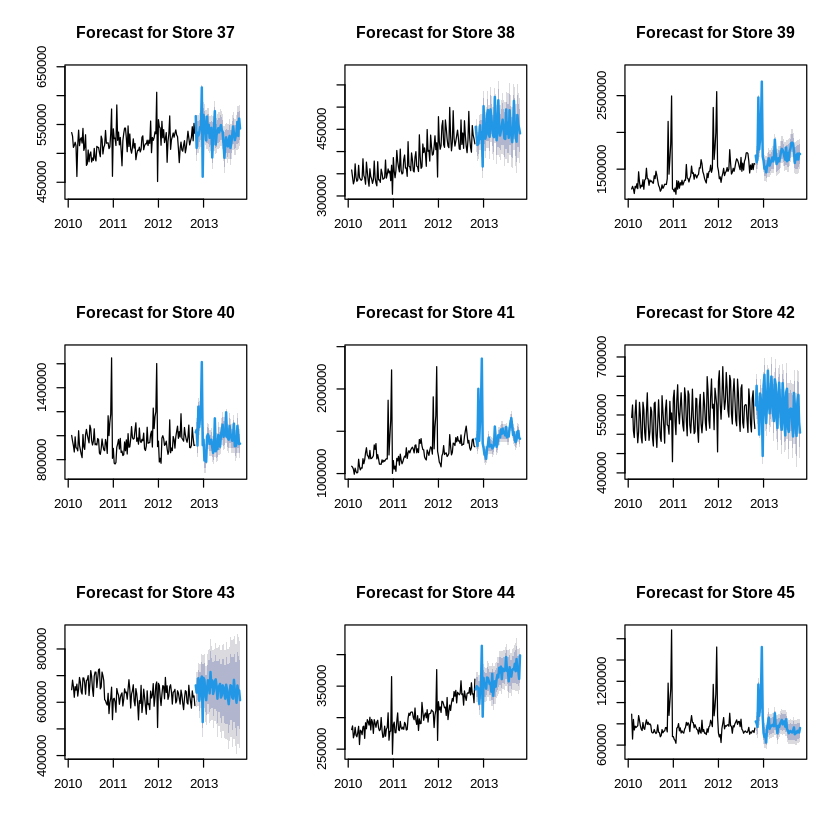

In [ ]:
# Fit an ARIMA model for each store and store the forecast in a list
library(forecast)
library(dplyr)

# Create an empty list to store models and forecasts
store_models <- list()
store_forecasts <- list()

# Loop over each store
for(store_id in unique(SALES$Store)) {
  # Subset data for the store
  store_sales <- filter(SALES, Store == store_id) %>%
    arrange(Date) %>%
    group_by(Date = as.Date(cut(Date, "week"))) %>%
    summarise(Weekly_Sales = sum(Weekly_Sales, na.rm = TRUE)) %>%
    ungroup()

  # Create the time series object
  start_date <- as.numeric(format(min(store_sales$Date), "%U"))
  start_year <- as.numeric(format(min(store_sales$Date), "%Y"))
  sales_ts <- ts(store_sales$Weekly_Sales, start=c(start_year, start_date), frequency=52)

  # Fit ARIMA model
  fit_arima <- auto.arima(sales_ts)
  store_models[[store_id]] <- fit_arima

  # Forecast the next 52 weeks (1 year)
  store_forecasts[[store_id]] <- forecast(fit_arima, h=52)
}


# Assuming the rest of the code from the previous example has been executed...

# Define the number of stores to plot at once
num_stores_to_plot <- 45 # For instance, you can plot 9 stores at a time

# Create a multi-panel plot
par(mfrow=c(3, 3)) # Adjust the layout to have 3 rows and 3 columns

# Plot the first 'num_stores_to_plot' stores
for(i in seq_len(min(length(store_forecasts), num_stores_to_plot))) {
  plot(store_forecasts[[i]], main = paste("Forecast for Store", i))
}



Building upon the initial success and learning from the limitations observed in the 2012 forecasts, we further extended our analysis to include the forecasted sales data for 2013. This time, we incorporated all available actual data from 2010 to 2012 to determine if using a more comprehensive dataset would enhance the model's ability to predict similar sales trends. The ARIMA models used for forecasting 2013 project this pattern forward, although with the usual caveats related to the uncertainty inherent in such predictions. For instance, the forecast for Store 6 suggests a steady trend, pointing to a stable customer base with predictable shopping patterns.

However, not all stores align with this pattern. Store 36, for example, shows a decline in actual sales, which the forecast suggests will either continue or level off at best. This store might benefit from a strategic overhaul to address the underlying causes of this downturn and to reinvigorate sales. Walmart could look into local market shifts, consumer behavior analytics, and potentially rebrand or revitalize the store's presence to reverse this negative trend.

On the flip side, Store 38 is witnessing an uptick in actual sales, with the forecast predicting sustained or slightly increasing sales moving forward. This presents an opportunity for Walmart to understand and continue the practices that are driving this positive outcome, ensuring that growth is not only maintained but also built upon.

The nuances revealed by these individual store forecasts underline the importance of a tailored approach. While holidays are a significant driver of increased sales across the majority of stores, each location has its unique rhythm and response to these periods. By leveraging predictive insights, Walmart can craft customized strategies for each store—optimizing inventory, staffing, and marketing efforts for stores with pronounced holiday sales, while developing innovative approaches to ignite sales in stores with less holiday influence.

In sum, these predictive models are invaluable tools for planning. They provide not just a confirmation of broad sales trends but also granular insights into the dynamics at the individual store level. This level of detail enables Walmart to not only prepare for expected fluctuations but also to craft proactive strategies

# Hypotheis Test


In [ ]:
t.test(Weekly_Sales ~ Holiday_Flag, data=SALES)



	Welch Two Sample t-test

data:  Weekly_Sales by Holiday_Flag
t = -2.6801, df = 504, p-value = 0.007602
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -141473.17  -21789.85
sample estimates:
mean in group 0 mean in group 1 
        1041256         1122888 




 The pvalue = 0.007602 which is less then 5%, therefore we can reject the null hypothesis, suggesting there is a statistically significant difference in mean weekly sales between holiday and non-holiday weeks.


 The 95 percent confidence interval: -141473.17 to -21789.85 gives a range of values for the true mean difference between holiday and non-holiday weekly sales. The fact that this interval does not include 0 strengthens the conclusion that there is a significant difference between the two means.



#### Outlier Detection

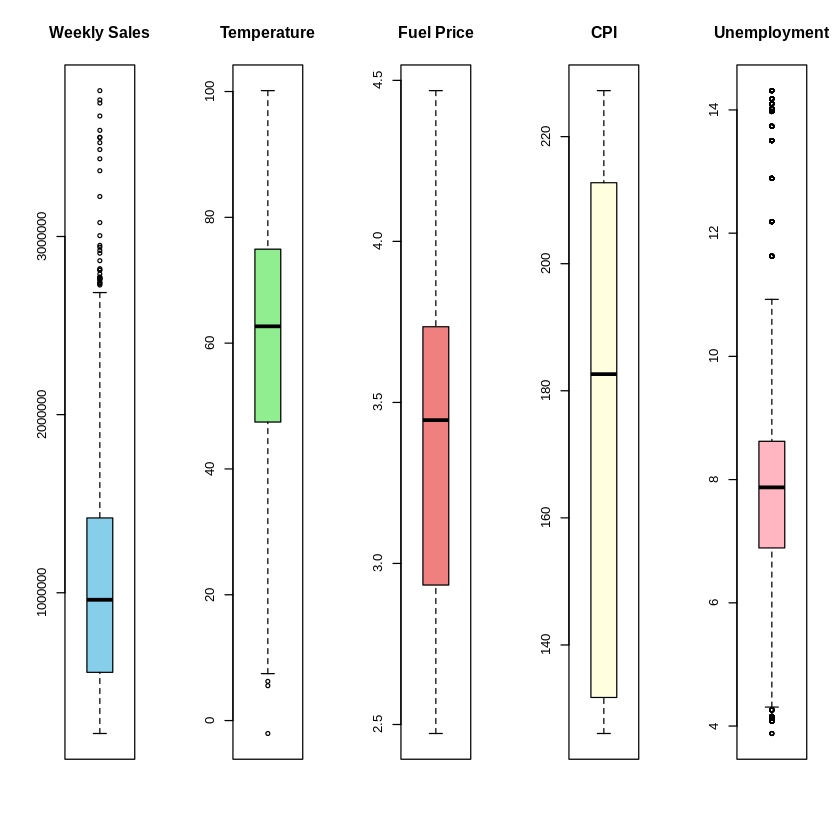

In [ ]:
# Set up the layout for the panel
par(mfrow = c(1,5))

# Create boxplots for each variable with labels
boxplot(SALES$Weekly_Sales, main = "Weekly Sales", col = "skyblue")
boxplot(SALES$Temperature, main = "Temperature", col = "lightgreen")
boxplot(SALES$Fuel_Price, main = "Fuel Price", col = "lightcoral")
boxplot(SALES$CPI, main = "CPI", col = "lightyellow")
boxplot(SALES$Unemployment, main = "Unemployment", col = "lightpink")

# Reset the layout to default
par(mfrow = c(1, 1))


Outliers denote data points that seem disconnected from the main cluster of data. These points, whether stemming from errors or genuine values, possess the potential to skew any model we construct. The identification of an outlier is inherently influenced by the perspective from which the data is examined. At a basic level, this perspective is shaped by whether or not and how the data undergo transformation (Maindonald & Braun, 2010). Boxplots, prove valuable in pinpointing outliers along a single dimension The presence of outliers often signals a departure from the assumptions underlying the model (Maindonald & Braun, 2010).

Three of our variables have potential outliers. The first is our response variable Weekly Sales. It is difficult to determine if the high-end points are truly outliers because the sales data is proprietary to Walmart. We do know that retail sales volume is highly seasonal with many days being high above the mean during Thanksgiving and Christmas. Also, different store formats (Walmart vs Walmart Supercenters) could have drastically different sales. For these reasons we do not feel it is necessary to remove any of the observations on account of weekly sales.

The second variable is Temperature with a few low outliers in the low end of the distribution. The lowest of the points is just below zero. We do not find it surprising to have a few average temps below zero as the data is dispersed through the entire year. Although we are not given the geographic area of the store, we can assume that with an average in the 60s that most of the stores are likely in temperate climate areas of the US. We do not feel that removing the observation sue to this data feature is necessary.

The third variable is Unemployment. There are outliers on the higher side of this distribution with the average just under 8% and the outliers ranging from 11% to 14%.  The years that the dataset spans are 2011-2012 only a few years after the 2008 housing crash. It would be understandable that unemployment rates would still be in the low double digits during this time as a result. Again, the geographic locations of the sores are unknown.  Thus, further analysis and comparison to Bureau of Labor Statistics data to our dataset is not practical. We are confident that these ranges are within reason and not due to error. So we will not remove observations due to outliers in this variable.  



### Check for Skew


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


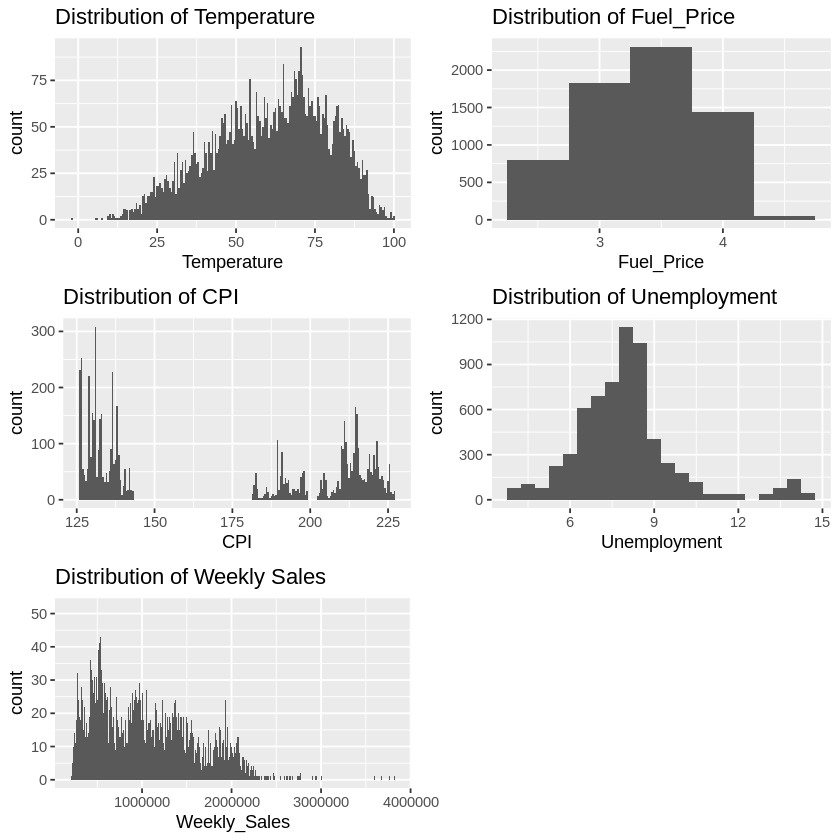

In [ ]:

library(gridExtra)
library(patchwork)

# Create a list of explanatory variables
explanatory_vars <- c("Temperature", "Fuel_Price", "CPI", "Unemployment")

# Create a list of plots
plots <- list()

# Loop through each explanatory variable and create a plot of its distribution
for (var in explanatory_vars) {
  plots[[var]] <- ggplot(SALES, aes_string(x = var)) +
    geom_histogram(binwidth = 0.5) +
    labs(title = paste("Distribution of", var))
}

# Create a plot of the dependent variable's distribution
plots[["Weekly_Sales"]] <- ggplot(SALES, aes(Weekly_Sales)) +
  geom_histogram(binwidth = 5000) +
  labs(title = "Distribution of Weekly Sales")

# Combine the plots into a grid
grid.arrange(grobs = plots, ncol = 2)


 Numerous data analysis techniques rely on the premise that data conform to a normal distribution, while complete adherence to normality is improbable significant deviations from this distribution pattern warrant attention and in analysis.  It's particularly crucial to scrutinize datasets exhibiting skewness, as such deviations can impact the validity of analyses. (Maindonald & Braun, 2010). In our data we can observe less than normal distributions in each if our variables. Weekly sales, our response variable, is positively skewed. The CPI variable is bimodal and possibly even tri-model. Unemployment is slightly skewed positively, and temp appears to be skewed negatively. This would warrant further investigation.

### Check for Normality

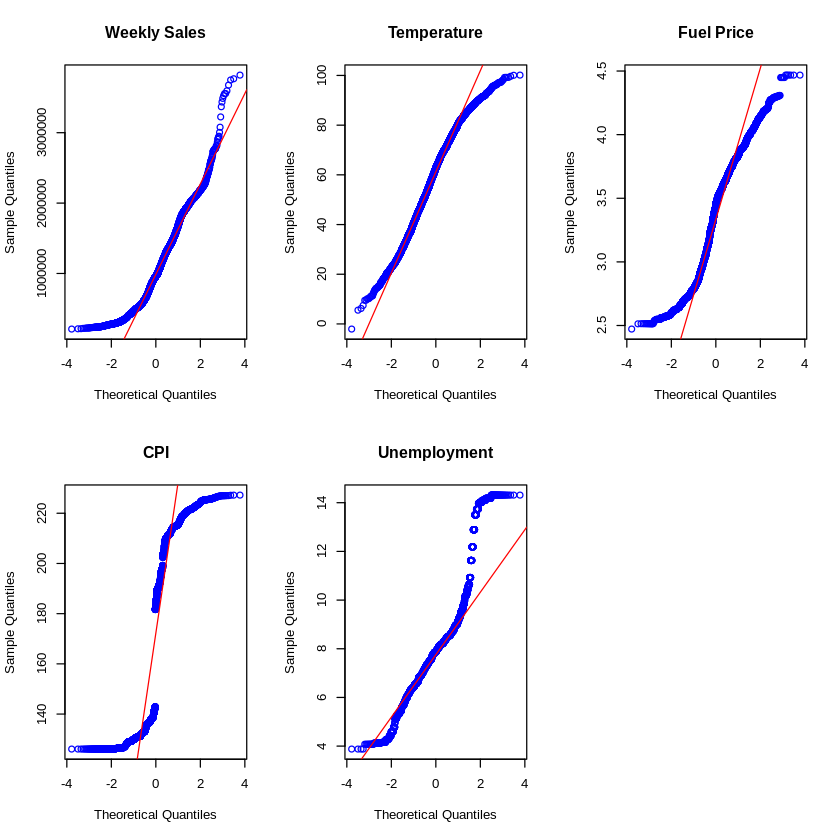

In [ ]:
# Set up the layout for the panel
par(mfrow = c(2, 3))

# Plot normal probability plots for each variable with labels and color
qqnorm(SALES$Weekly_Sales, main = "Weekly Sales", col = "blue")
qqline(SALES$Weekly_Sales, col = "red")
qqnorm(SALES$Temperature, main = "Temperature", col = "blue")
qqline(SALES$Temperature, col = "red")
qqnorm(SALES$Fuel_Price, main = "Fuel Price", col = "blue")
qqline(SALES$Fuel_Price, col = "red")
qqnorm(SALES$CPI, main = "CPI", col = "blue")
qqline(SALES$CPI, col = "red")
qqnorm(SALES$Unemployment, main = "Unemployment", col = "blue")
qqline(SALES$Unemployment, col = "red")
# Reset the layout to default
par(mfrow = c(1, 1))


 Histograms lack effectiveness in determining whether a distribution conforms reasonably to normality, a more reliable tool for evaluating normality is the normal probability plot, also known as a quantile-quantile plot. (Maindonald & Braun, 2010). This method involves sorting the data values and plotting them against the expected ordered values under the assumption of a normal distribution. If the dataset adheres to a normal distribution, the plot should approximate a straight lie, however if some points at the ends stray off the data should still be assumed to be normal (Maindonald & Braun, 2010).

most of our variables all show signs of non-normality. Fuel looks to appx normal. CPI shows bimodal data with a break int the line. Temp, weekly sales, CPI show signed of non-normality with the plot as well. We will address can in two ways. The first is to transform the variables using a log function. After we have transformed, we can use a standard linear model to see results. The second is to use regression methods that are resistant to non-normal data using the original non-log dataset. We can compare the results to find the best fit.


## MODEL 1 Baseline (Vanilla) Linear Model

In [ ]:
#Split data between Training and Test
set.seed(123)
ind <- sample(2, nrow(SALES), replace=T, prob= c(0.5, 0.5))
training<- SALES[ind == 1,]
test <- SALES[ind ==2,]

#Build training model
training_model <- lm(Weekly_Sales ~., data = training)
summary(training_model)




Call:
lm(formula = Weekly_Sales ~ ., data = training)

Residuals:
    Min      1Q  Median      3Q     Max 
-617890  -62266   -4193   44933 1609873 

Coefficients: (1 not defined because of singularities)
                  Estimate Std. Error t value             Pr(>|t|)    
(Intercept)     26136248.8  4280848.9   6.105 0.000000001152316862 ***
Store2            414053.1    23989.3  17.260 < 0.0000000000000002 ***
Store3          -1191494.7    25940.8 -45.931 < 0.0000000000000002 ***
Store4           1069842.6   189208.3   5.654 0.000000017062250339 ***
Store5          -1268953.1    24881.9 -50.999 < 0.0000000000000002 ***
Store6              2136.1    25118.6   0.085             0.932235    
Store7           -766066.9    56829.4 -13.480 < 0.0000000000000002 ***
Store8           -705522.1    27080.5 -26.053 < 0.0000000000000002 ***
Store9          -1072368.0    27134.0 -39.521 < 0.0000000000000002 ***
Store10           948426.7   190731.0   4.973 0.000000696426177074 ***
Store11       


-Coefficients
There is an array of coefficients in the positive and negative ranges.

-P Value of variables:
 Store 6, 12, 17, 18, 22, 26, 34, 35 and 40 are not statistically significant. Holiday Flag and Fuel price are not significant either. The remainder are significant with an exception of Week which has an error liekly due to having too high a correlation with another variable like date of year.

-P value of Model:
The results show that the model is statistically significant with a very low P value.

-R2:
The multiple r square is .9394 meaning that 94% of the variability is explained with our model.  

Overall:
We hope the Multiple R2 will increase after additional treatments are made.


#### Step AIC and Feature Drop



In [ ]:
# best model with untransformed data

library(MASS)

step_model_1 <- stepAIC(training_model, direction = "both", trace = F)
summary(step_model_1)
AIC(step_model_1)


Attaching package: ‘MASS’


The following object is masked from ‘package:patchwork’:

    area


The following object is masked from ‘package:dplyr’:

    select





Call:
lm(formula = Weekly_Sales ~ Store + Date + Temperature + CPI + 
    Unemployment + Year + Month + Pre_Holiday, data = training)

Residuals:
    Min      1Q  Median      3Q     Max 
-618874  -62409   -4205   45540 1606383 

Coefficients:
                  Estimate Std. Error t value             Pr(>|t|)    
(Intercept)     26225913.5  4260598.6   6.155 0.000000000844310365 ***
Store2            414058.9    23982.4  17.265 < 0.0000000000000002 ***
Store3          -1192072.5    25919.0 -45.992 < 0.0000000000000002 ***
Store4           1084101.0   187859.2   5.771 0.000000008663096803 ***
Store5          -1269645.9    24856.0 -51.080 < 0.0000000000000002 ***
Store6              1958.4    25107.2   0.078             0.937832    
Store7           -763329.9    56563.0 -13.495 < 0.0000000000000002 ***
Store8           -706430.9    27037.5 -26.128 < 0.0000000000000002 ***
Store9          -1073538.5    27074.9 -39.651 < 0.0000000000000002 ***
Store10           959303.6   189938.0   5.051 

[1] 84444.68

Variables:
Holiday Flag and Fuel_price were removed by the StepAIC function.



Coefficient:
There is a mixed array of positive and negative coefficients

P values of Variable:
There are numerous variables that have significance. What is interesting is that even though many of the store number variables are not significant, the Step function did not drop them. Liekly due to the m being form one source variable.

The overall significant of the model is high with a P value far lower than .05.

The multiple R square is a respectables .9394 meaning that 94% of variance can be explained by the model. There was no improvement on the R2 between our two baseline


## MODEL 2 LOG Transformed Linear Model

### Transform Data

In [ ]:
LOG <- SALES


LOG$Log_Fuel_Price <- log(SALES$Fuel_Price)
LOG$Log_CPI <- log(SALES$CPI)
LOG$Log_Unemployment <- log(SALES$Unemployment)

LOG$Fuel_Price <- NULL
LOG$CPI <- NULL
LOG$Unemployment <- NULL


head(LOG)

,Weekly_Sales,Store,Date,Holiday_Flag,Temperature,Year,Month,Week,Pre_Holiday,Log_Fuel_Price,Log_CPI,Log_Unemployment
,<dbl>,<fct>,<date>,<int>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>
1,1643691,1,2010-02-05,0,42.31,2010,02,5,TRUE,0.9446838,5.352315,2.092605
2,1641957,1,2010-02-12,1,38.51,2010,02,6,FALSE,0.9353087,5.353005,2.092605
3,1611968,1,2010-02-19,0,39.93,2010,02,7,FALSE,0.9218751,5.353228,2.092605
4,1409728,1,2010-02-26,0,46.63,2010,02,8,FALSE,0.9403978,5.353372,2.092605
5,1554807,1,2010-03-05,0,46.50,2010,03,9,FALSE,0.9650809,5.353516,2.092605
6,1439542,1,2010-03-12,0,57.79,2010,03,10,FALSE,0.9809542,5.353661,2.092605


In scientific research, transformations are applied for specific purposes. Taking the example of apple weights, if the study is more concerned with the surface area, it's beneficial to use the cube root of the weight as the variable. Similarly, when examining proportional changes, logarithms of measurements become useful.Statisticians employ transformations to make data distributions more symmetrical and closer to normal, and to streamline the analysis if a single transformation can resolve several issues. A log transformation might normalize data and remove or introduce interactions. It can also reduce skewness but may increase variability. With the advent of specialized models like generalized linear models that accommodate non-normal errors, the need for transformations has decreased. (Maindonald & Braun, 2010).


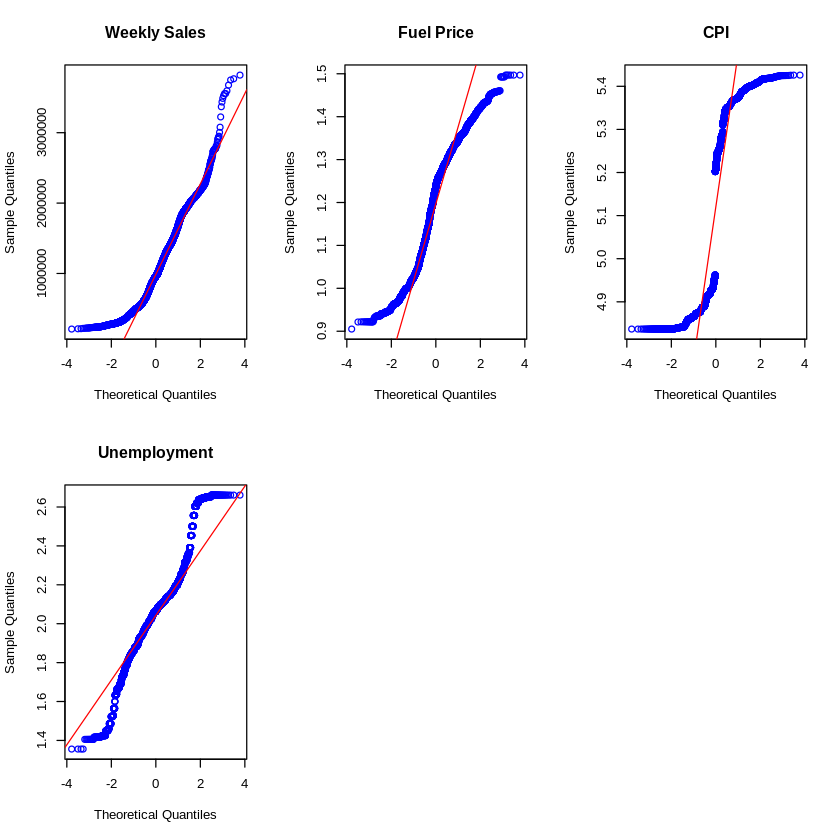

In [ ]:
# Set up the layout for the panel
par(mfrow = c(2, 3))

# Plot normal probability plots for each variable with labels and color
qqnorm(LOG$Weekly_Sales, main = "Weekly Sales", col = "blue")
qqline(LOG$Weekly_Sales, col = "red")
qqnorm(LOG$Log_Fuel_Price, main = "Fuel Price", col = "blue")
qqline(LOG$Log_Fuel_Price, col = "red")
qqnorm(LOG$Log_CPI, main = "CPI", col = "blue")
qqline(LOG$Log_CPI, col = "red")
qqnorm(LOG$Log_Unemployment, main = "Unemployment", col = "blue")
qqline(LOG$Log_Unemployment, col = "red")
# Reset the layout to default
par(mfrow = c(1, 1))

 The log transformations did not have visually have a signficant impact on the normality of the data. As a reuslt the performance of the model may suffer.


In [ ]:
#Creating additive and mutiplicate custom features

Log_CPI_Unemployment_Mult <- LOG$Log_CPI * LOG$Log_Unemployment
Log_Fuel_Price_Temp_Mult <- LOG$Log_Fuel_Price * LOG$Temperature


In [ ]:
#Adding features to LOG

LOG$Log_CPI_Unemployment_Mult <- Log_CPI_Unemployment_Mult
LOG$Log_Fuel_Price_Temp_Mult <- Log_Fuel_Price_Temp_Mult
head(LOG)

,Weekly_Sales,Store,Date,Holiday_Flag,Temperature,Year,Month,Week,Pre_Holiday,Log_Fuel_Price,Log_CPI,Log_Unemployment,Log_CPI_Unemployment_Mult,Log_Fuel_Price_Temp_Mult
,<dbl>,<fct>,<date>,<int>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1643691,1,2010-02-05,0,42.31,2010,02,5,TRUE,0.9446838,5.352315,2.092605,11.20028,39.96957
2,1641957,1,2010-02-12,1,38.51,2010,02,6,FALSE,0.9353087,5.353005,2.092605,11.20172,36.01874
3,1611968,1,2010-02-19,0,39.93,2010,02,7,FALSE,0.9218751,5.353228,2.092605,11.20219,36.81047
4,1409728,1,2010-02-26,0,46.63,2010,02,8,FALSE,0.9403978,5.353372,2.092605,11.20249,43.85075
5,1554807,1,2010-03-05,0,46.50,2010,03,9,FALSE,0.9650809,5.353516,2.092605,11.20279,44.87626
6,1439542,1,2010-03-12,0,57.79,2010,03,10,FALSE,0.9809542,5.353661,2.092605,11.20309,56.68935


We devised two bespoke features for our analysis, each presented in both additive and multiplicative formulations. The initial feature amalgamates Consumer Price Index (CPI) and unemployment rate, both of which serve as pivotal economic indicators signifying the economic prosperity of a nation, thus constituting an inherently correlated pair. The subsequent feature pairs fuel prices with temperature, a relationship rooted in the phenomenon where escalating temperatures tend to correspond with heightened fuel prices owing to amplified demand.

### Train/Test Slit

In [ ]:
set.seed(123)
ind <- sample(2, nrow(LOG), replace=T, prob= c(0.5, 0.5))
ind

[1] 2 1 2 1 1 2 1 1 1 2 1 2 1 1 2 1 2 2 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 2 1
  [38] 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 1 2 2 1 1 2 1 2 2 2 1 2 1 1 1 2 1 1 1 2
  [75] 2 2 2 1 2 2 2 1 2 1 2 2 1 1 1 2 2 1 2 1 2 2 1 2 2 1 1 2 2 1 2 1 1 1 2 2 1
 [112] 2 2 1 1 2 1 1 1 2 1 2 2 2 2 1 2 2 2 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 2 2 2
 [149] 2 1 1 2 2 2 2 2 1 2 2 2 1 2 1 2 2 1 1 2 2 2 1 2 1 1 1 1 2 1 1 1 1 2 1 2 1
 [186] 2 2 1 1 1 2 2 1 1 1 2 2 1 2 1 2 1 1 1 2 1 2 2 2 2 2 2 2 1 2 1 2 2 1 1 2 1
 [223] 1 1 2 2 2 1 1 1 1 2 1 2 2 2 2 1 2 1 1 1 2 1 2 1 2 1 1 1 2 2 1 2 1 1 2 2 2
 [260] 1 1 1 1 1 1 1 2 2 2 1 1 2 2 2 1 1 1 2 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 1 1 1
 [297] 1 2 2 1 1 2 1 1 1 2 2 2 2 2 2 2 1 2 2 1 1 2 2 1 1 2 2 1 2 2 1 2 2 1 1 2 1
 [334] 1 2 2 1 1 1 1 2 2 1 2 2 2 1 2 2 1 2 1 1 2 1 1 1 2 2 1 2 2 1 2 2 1 2 2 2 2
 [371] 2 2 1 2 1 1 1 2 2 1 1 1 2 1 1 1 2 2 2 2 1 2 1 1 2 2 2 2 2 1 1 2 1 1 2 2 1
 [408] 2 2 1 2 1 2 2 2 2 1 2 2 2 1 1 1 2 1 1 2 2 2 1 1 1 2 1 2 1 2 2 2 2 2 1 1 2
 [445] 1 1 1 2 2 1 1 2 2 2 2 1 1 1 2 2 1 2 2 2 1 2 2 1 2 1 2 1 2 1 1 2 1 2 2 1 2
 [482] 1 2 1 1 2 2 1 2 1 1 2 2 1 2 1 2 2 1 1 2 2 2 2 2 2 1 1 1 2 2 2 1 2 1 2 2 1
 [519] 2 1 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1 2 1 1 2 1 2 1 2 1 1 2 1 1 2 2 2 1 1 1
 [556] 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 1 1 1 2 1 1 2 2 1 2 1 1 1 2 1 2 2 1 1 1 1 2
 [593] 1 2 2 1 1 2 1 2 2 1 2 2 2 1 2 1 2 2 1 2 2 1 1 1 1 1 1 2 1 1 1 2 2 2 2 1 2
 [630] 2 1 1 2 1 2 2 1 1 1 2 1 1 1 2 2 1 1 2 2 1 1 1 2 1 1 1 1 2 1 2 1 1 2 1 2 2
 [667] 1 2 1 2 2 1 2 2 2 1 1 2 2 2 1 1 1 1 1 1 1 2 2 2 2 1 1 2 2 1 2 2 2 2 1 2 2
 [704] 1 2 1 1 2 2 2 1 1 1 1 2 2 2 2 1 2 2 1 1 1 1 1 1 1 1 2 2 1 1 1 2 2 1 1 2 2
 [741] 1 2 2 1 2 1 1 2 1 1 2 2 2 2 1 2 2 1 2 2 1 2 1 2 1 2 2 2 1 1 1 1 1 1 2 2 2
 [778] 2 1 1 2 1 2 1 1 2 2 2 2 1 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1 2 1 2 1
 [815] 1 2 2 2 1 1 1 2 1 1 1 2 2 2 2 1 2 1 2 1 1 1 1 1 2 2 1 1 1 2 1 2 1 2 2 2 2
 [852] 1 1 1 1 2 1 2 2 1 2 2 1 2 1 2 2 2 1 1 2 2 1 1 1 1 2 1 1 1 2 1 1 2 1 1 2 2
 [889] 2 2 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 1 1 1 2 2 1 2 2 1 1
 [926] 1 2 1 2 1 1 2 1 1 1 2 1 1 1 2 1 2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 1 2 2 2 1 2
 [963] 1 2 1 1 1 2 1 2 1 2 1 2 2 1 1 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 1 2 1 1 1 2 1
[1000] 2 2 1 2 1 1 2 1 2 2 2 2 2 2 1 2 1 1 1 2 2 2 1 1 2 1 2 1 2 2 1 2 1 2 2 1 1
[1037] 2 1 2 2 1 1 2 1 2 2 2 2 1 1 1 1 1 1 1 2 1 2 2 1 1 2 2 2 2 1 1 2 1 1 1 1 1
[1074] 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2 2 2 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 1
[1111] 2 1 2 2 2 2 2 1 2 1 2 2 1 2 2 2 1 1 2 1 1 1 1 1 1 1 2 2 1 2 1 2 2 1 2 2 1
[1148] 1 2 2 1 1 1 1 1 2 2 1 1 2 2 2 2 2 2 2 1 2 2 1 2 2 1 1 2 1 1 2 2 1 2 2 1 1
[1185] 1 2 2 1 1 1 2 1 2 1 2 2 1 2 1 2 1 1 2 1 2 1 2 2 1 1 2 1 2 1 2 1 2 1 2 1 2
[1222] 1 2 1 1 2 2 2 1 1 2 2 2 1 2 2 2 1 1 2 2 2 1 2 1 2 1 2 2 1 1 1 1 2 2 1 2 2
[1259] 1 1 2 1 2 2 1 2 1 1 2 1 2 1 2 1 1 1 1 1 2 2 2 1 1 1 1 2 1 1 2 1 1 1 2 1 2
[1296] 2 1 1 1 1 2 2 1 1 1 1 2 2 1 2 2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 2 2 2 1 1 2
[1333] 1 1 2 2 1 1 1 1 2 2 2 2 1 1 2 1 1 1 2 2 2 2 2 2 2 1 2 2 1 2 1 2 2 2 2 1 2
[1370] 2 2 2 2 1 1 1 2 1 2 1 2 2 1 2 1 2 2 1 2 2 1 1 2 2 2 1 1 2 2 2 2 2 2 2 2 1
[1407] 1 1 2 1 1 1 1 2 2 1 1 2 1 2 1 1 2 1 2 2 2 1 1 2 1 2 1 1 2 2 1 1 1 1 2 1 2
[1444] 2 1 1 2 2 1 2 1 1 1 2 1 1 2 1 1 2 1 1 1 2 2 1 1 2 2 2 1 2 1 2 2 1 2 1 1 1
[1481] 1 2 1 1 1 2 1 2 1 1 2 2 1 1 2 1 1 2 1 2 1 1 2 2 1 1 1 2 2 1 2 1 1 2 2 2 2
[1518] 2 2 2 1 2 1 2 1 2 2 2 1 2 1 1 1 2 2 2 2 2 1 2 2 1 2 1 1 2 2 2 1 1 1 2 2 2
[1555] 2 2 1 2 2 1 1 2 1 2 1 2 2 1 2 1 2 2 1 2 2 1 2 2 2 2 1 2 2 2 1 1 1 2 2 2 1
[1592] 1 1 1 2 2 1 2 1 2 1 2 2 1 1 2 1 2 1 2 1 1 2 1 1 2 1 2 2 2 2 2 2 1 2 1 1 2
[1629] 1 1 1 1 2 1 1 1 2 2 2 1 2 1 1 1 2 1 1 1 2 2 2 1 2 2 2 1 2 1 2 1 1 2 2 1 1
[1666] 2 1 2 2 2 1 1 2 1 2 1 1 1 1 2 2 1 1 2 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 2 1 2
[1703] 2 1 1 1 2 1 1 1 2 2 2 1 2 1 1 1 1 2 1 2 1 2 2 1 2 1 2 2 1 2 2 1 1 1 2 1 1
[1740] 1 2 1 1 2 2 2 1 1 1 2 1 1 1 1 1 2 1 2 2 1 1 2 2 2 2 1 1 2 1 1 1 1 2 1 2 2
[1777] 2 2 1 2 2 2 1 1 2 2 1 2 1 1 2 2 1 1 2 2 1 1 1 1 2 1 2 1 1 2 1 1 1 1 2 1 1
[1814] 1 2 2 1 2 1 2 1 2 2 1 1 1 2

We set the seed to ensure reproducibility. A random list is created in two groups. Either the number is 1 or 2 with replacement and a 50% probability of each observation ending up in either group. We then use this random list to split the data int eh next step.  

In [ ]:
#Split data between Training and Test
training_LOG <- LOG[ind == 1,]
test_LOG <- LOG[ind ==2,]

With the data now transformed and randomized we can build our model in the training set.  

### Building the LM LOG Model


In [ ]:
LOG_model <- lm(Weekly_Sales ~ ., data = training_LOG)
summary(LOG_model)
AIC(LOG_model)


Call:
lm(formula = Weekly_Sales ~ ., data = training_LOG)

Residuals:
    Min      1Q  Median      3Q     Max 
-628128  -63555   -3339   45906 1603746 

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value             Pr(>|t|)
(Intercept)               19720962.6  5231748.2   3.769             0.000167
Store2                      414353.0    23981.7  17.278 < 0.0000000000000002
Store3                    -1196981.4    26814.9 -44.639 < 0.0000000000000002
Store4                     1138225.9   393610.4   2.892             0.003858
Store5                    -1296106.8    27239.0 -47.583 < 0.0000000000000002
Store6                      -18032.4    26153.0  -0.689             0.490563
Store7                     -757729.0    85443.7  -8.868 < 0.0000000000000002
Store8                     -736888.3    29257.3 -25.186 < 0.0000000000000002
Store9                    -1104275.1    29396.1 -37.565 < 0.0000000000000002
Store10              

[1] 84436.92

### Interpretation of results
This model includes custom multiplicative features, log transformation of non-normal variables.

Coefficients: There are strong coefficients as with the base model. Some store coefficients swing the weekly sales over $1million.

Variable Significance: Holiday flag and Week appeared to have not statistical significance, but what is surprising is that none of our LOG transformed features including our two custom features have no significance as well. Log of CPI only had a slight statistical significance at the .o1 level.

Model Significance: The Log model holds a high degree of significance just like the baseline model.

R Squared: The R square stayed the same as the baseline model at roughly 94%. A closer look at the AIC number comparison will be at the conclusion.

The AIC is 84436.9.

Next we will optimize the AIC with step AIC to see if any better performance can be yielded.




In [ ]:
#install.packages('MASS')
library(MASS)
step_LOG_model <- stepAIC(LOG_model, direction = "both", trace = F)
summary(step_LOG_model)
AIC(step_LOG_model)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select





Call:
lm(formula = Weekly_Sales ~ Store + Date + Temperature + Year + 
    Month + Pre_Holiday + Log_CPI + Log_CPI_Unemployment_Mult, 
    data = training_LOG)

Residuals:
    Min      1Q  Median      3Q     Max 
-620222  -62742   -4819   46529 1609556 

Coefficients:
                            Estimate Std. Error t value             Pr(>|t|)
(Intercept)               19872805.5  5192809.7   3.827             0.000132
Store2                      414296.0    23955.9  17.294 < 0.0000000000000002
Store3                    -1197757.3    26641.9 -44.958 < 0.0000000000000002
Store4                     1240007.8   330213.5   3.755             0.000176
Store5                    -1288731.8    25308.2 -50.922 < 0.0000000000000002
Store6                      -12758.8    25471.2  -0.501             0.616471
Store7                     -742515.7    75137.1  -9.882 < 0.0000000000000002
Store8                     -730421.7    28367.1 -25.749 < 0.0000000000000002
Store9                    -1097790.7 

[1] 84432.21

Step AIC tests all possible subsets of data starting from one regressor and prceeding on the all regressors. Its goal is to maximize AIC, we can compare the AIC to other models.

With our data the step AIC function eliminated Holiday_Flag, Week, preholiday and fuel but kept a majority of the features.

The Mutiple R squared remained virtually unchanged.

The AIC is 92487.32 virtually identical to the non-AIC optimized Log model.


### Prediction and Test Comparison

In [ ]:
predict_LOG <- predict(step_LOG_model, test_LOG)


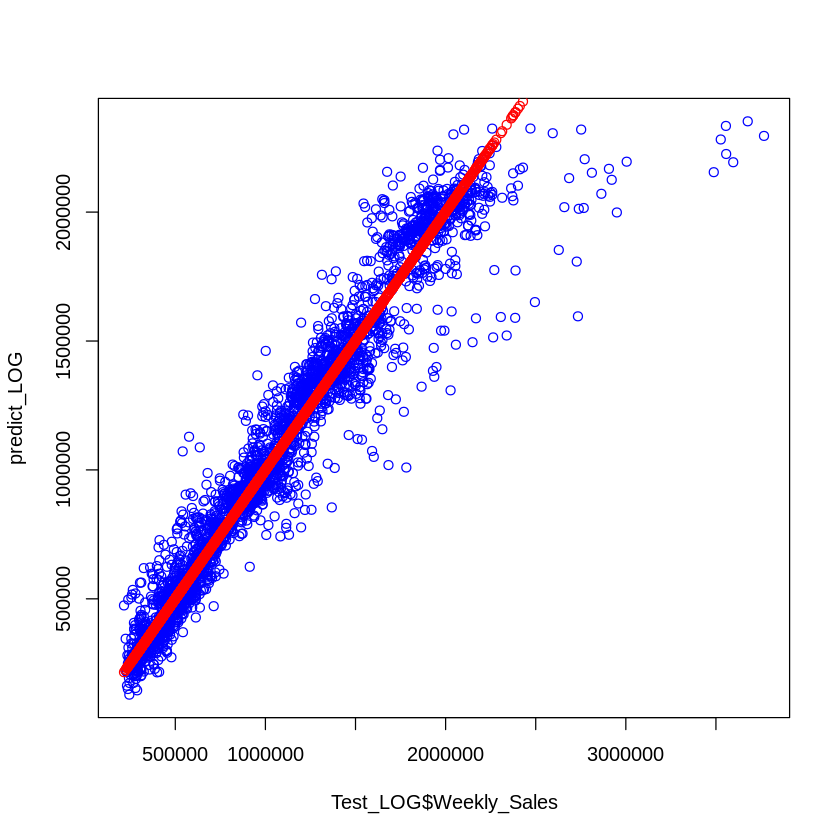

In [ ]:
# Predictions vs Test set values
plot(test_LOG$Weekly_Sales, predict_LOG, col = "blue", xlab = "Test_LOG$Weekly_Sales", ylab = "predict_LOG")
points(test_LOG$Weekly_Sales, test_LOG$Weekly_Sales, col = "red")



The red line shows what would be the perfect relationship between between the predictions and actuals. The further the two disperse from the line the less predictive power the model shows. Here we can observe a great deal of dispersion toward the high end of weekly sales where the model had a difficult time making predictions.   

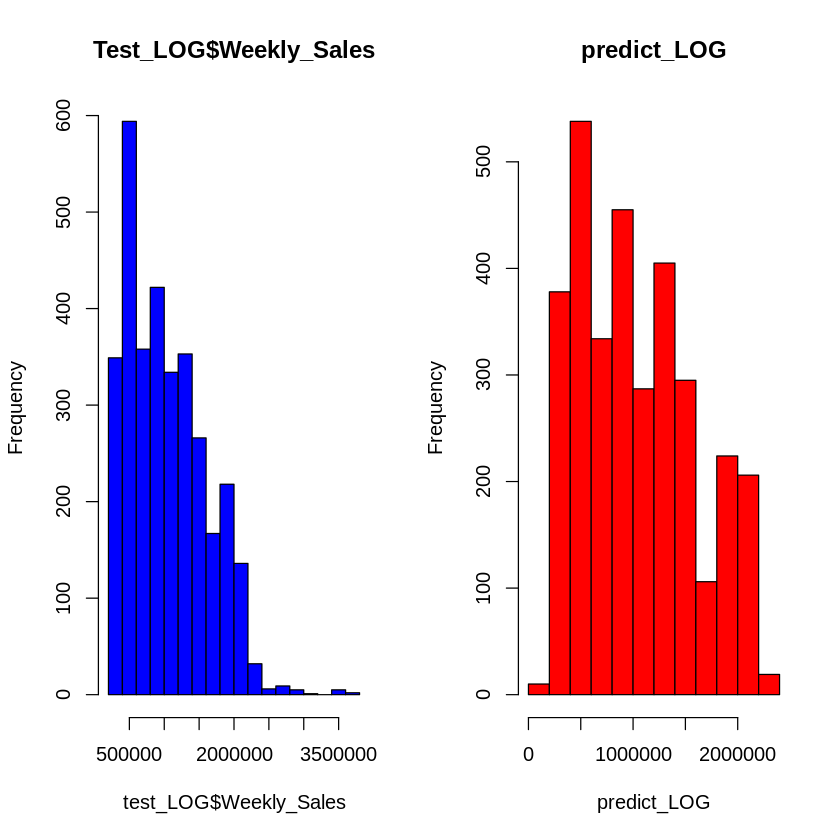

In [ ]:

par(mfrow = c(1, 2))
hist(test_LOG$Weekly_Sales, col = "blue", main = "Test_LOG$Weekly_Sales")
hist(predict_LOG, col = "red", main = "predict_LOG")






The visualizations show the original log sales without treatment and the predictions based of log treated variables. Further evidence that the Log treatment did successfully normalize the data but at a cost of struggling to predict more extreme values.


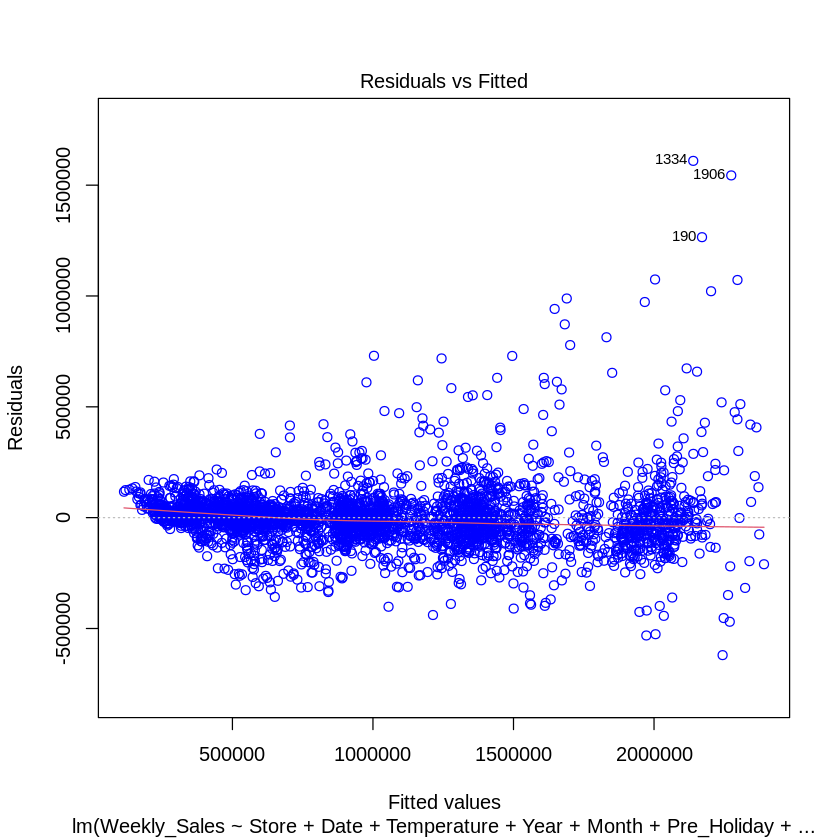

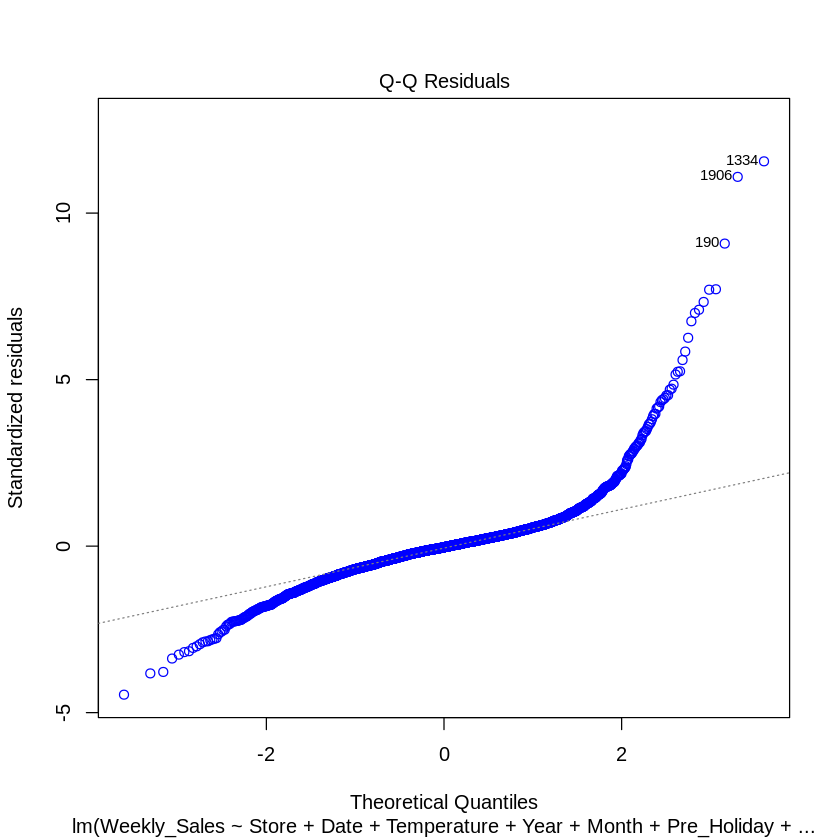

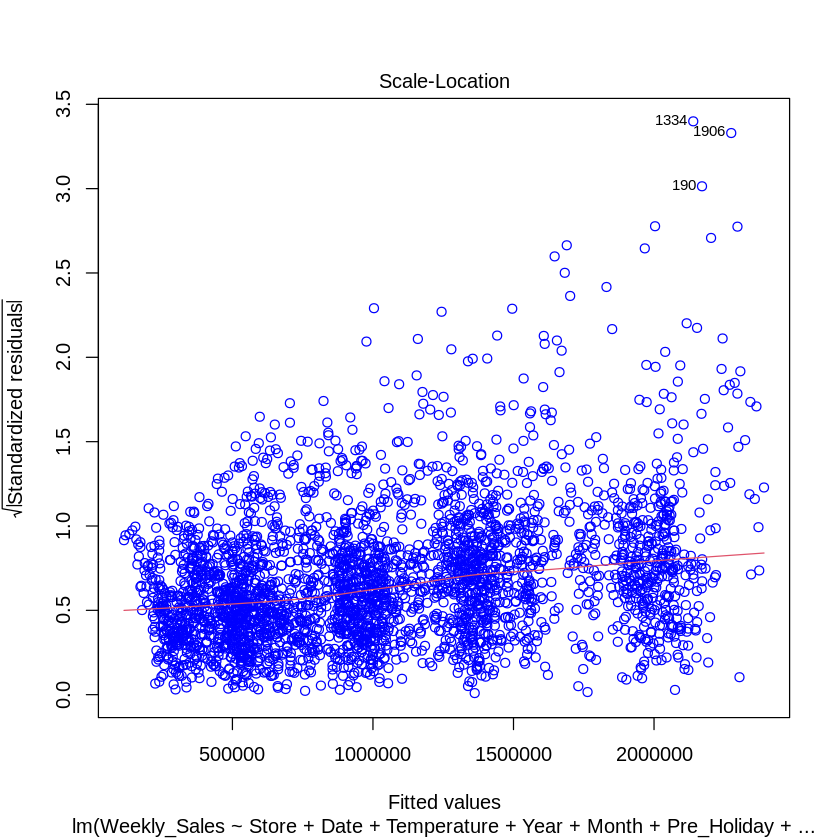

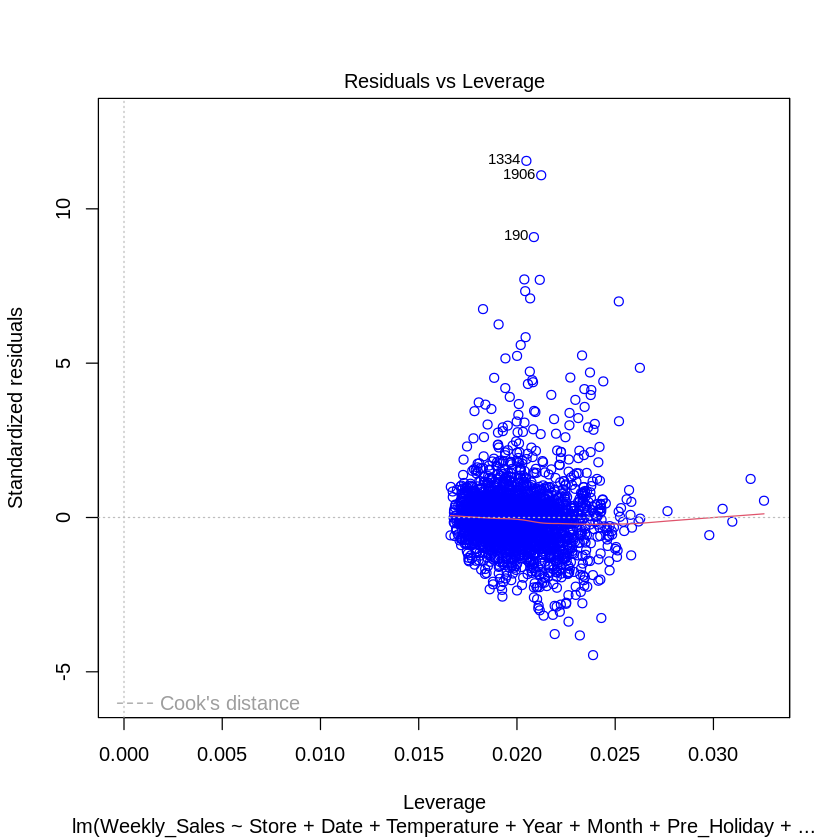

In [ ]:
plot(step_LOG_model, col = "blue")


Created to assess the stability of variance, Cooks Distance is a tool that pinpoints residuals with a significant impact on the regression lines shape. Points exhibiting Cooks distances exceeding one, or those with Cooks distances notably higher than others, should be examined further. Cooks Distance serves as an influence metric, gauging how much the regression line would shift if a particular point were excluded. However, these plots are not conclusive; they merely highlight points meriting additional scrutiny. (Maindonald & Braun, 2010).

When an outlier appears to be a legitimate data point, conducting the analysis with and without this outlier is considered best practice. Should the inclusion of a suspected outlier not significantly alter the practical application and interpretation of the results, it's generally advisable to keep it in the primary analysis. Conversely, if a seemingly valid outlier is left out of the main analysis it's important to report this and discuss how its exclusion alters the analysis. This ensures transparency and allows for a comprehensive understanding of the data's impact on the results. (Maindonald & Braun, 2010).

We know that the sales data is valid for the data points that are skewing the distribution (1906, 1334, 190). But it may be worth exploring the model without these data points.

In [ ]:
#Run VIF
library(car)
vif(step_LOG_model)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:psych’:

    logit




,GVIF,Df,GVIF^(1/(2*Df))
Store,225237.379201,44,1.150338
Date,1145.388919,1,33.843595
Temperature,12.741143,1,3.569474
Year,1271.116315,2,5.970990
Month,2453.740699,11,1.425880
Pre_Holiday,2.158106,1,1.469049
Log_CPI,3553.050098,1,59.607467
Log_CPI_Unemployment_Mult,17.162496,1,4.142764



The Variance Inflation Factor (VIF) is a measure that helps to identify the presence of multicollinearity in the linear regression models. Multicollinearity occurs when independent variables in the model are correlated. This can lead to unreliable and unstable estimates of regression coefficients, making it difficult to assess the individual effect of each variable.


Store: The GVIF is very high, but when adjusted for the number of levels in the factor variable (Store has 44 levels), the GVIF^(1/(2*Df)) value is 1.150211, which indicates no problematic multicollinearity.

Date: The GVIF, before adjusting for degrees of freedom, suggests that Date could be highly multicollinear with other predictors. After adjusting for degrees of freedom, the value is 33.798885, which is still well above the common threshold of 10, suggesting that Date is likely causing multicollinearity issues.

Temperature: The GVIF^(1/(2*Df)) is 3.569296 which is below the usual threshold of concern of 10.

Year: The adjusted VIF is 5.965300, which is also below the threshold of 10.

Month: The GVIF^(1/(2*Df)) is 1.390631, which is also below the threshold of 10 indicating that there is no significant multicollinearity issue with Month.

Log_CPI: This variable has a very high GVIF^(1/(2*Df)) of 59.558399, indicating a severe multicollinearity concern.

Log_CPI_Unemployment_Mult: This is a product term meant to capture the interaction between Log_CPI and Log_Unemployment. The GVIF^(1/(2*Df)) is 4.142117 which is below the threshold of 10.

## MODEL 3- Log Transformed with No Outliers

We will not comment on every step in this model as this will be roughly the same as the last model,we are just removing the three outliers highlighted above (1906, 1334, 1958) to measure response as well as dropping LOG_CPI and Date that have VIF scores in excess of 10.

Warning message in log(SALES$Temperature):
“NaNs produced”



Call:
lm(formula = Weekly_Sales ~ Store + Holiday_Flag + Month + Week + 
    LOG_Temperature + LOG_CPI_Unemployment_Mult + LOG_Fuel_Price_Temp_Mult, 
    data = training_LOG_NO_OUTLIERS)

Residuals:
    Min      1Q  Median      3Q     Max 
-633177  -61827   -4272   44201 1415726 

Coefficients:
                            Estimate Std. Error t value             Pr(>|t|)
(Intercept)                1857443.6   100833.8  18.421 < 0.0000000000000002
Store2                      411691.5    24276.2  16.959 < 0.0000000000000002
Store3                    -1171073.0    25069.4 -46.713 < 0.0000000000000002
Store4                      410725.9    30625.4  13.411 < 0.0000000000000002
Store5                    -1284091.3    24812.2 -51.752 < 0.0000000000000002
Store6                       -1975.3    24941.4  -0.079             0.936880
Store7                     -924030.3    26189.5 -35.282 < 0.0000000000000002
Store8                     -710487.9    25765.6 -27.575 < 0.0000000000000002
Store9    

[1] 84446.91

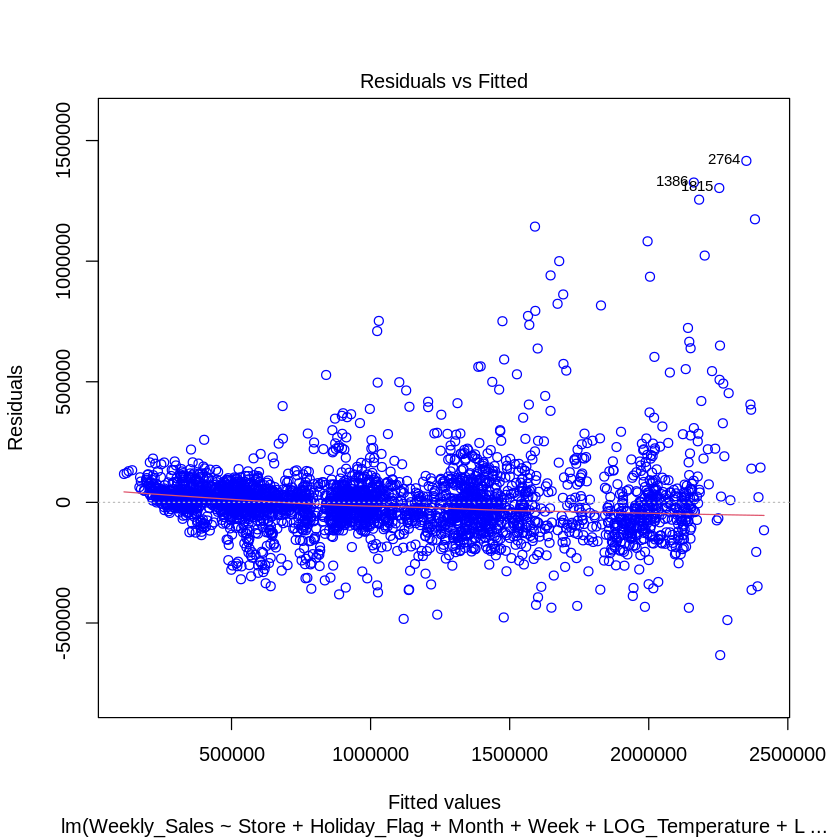

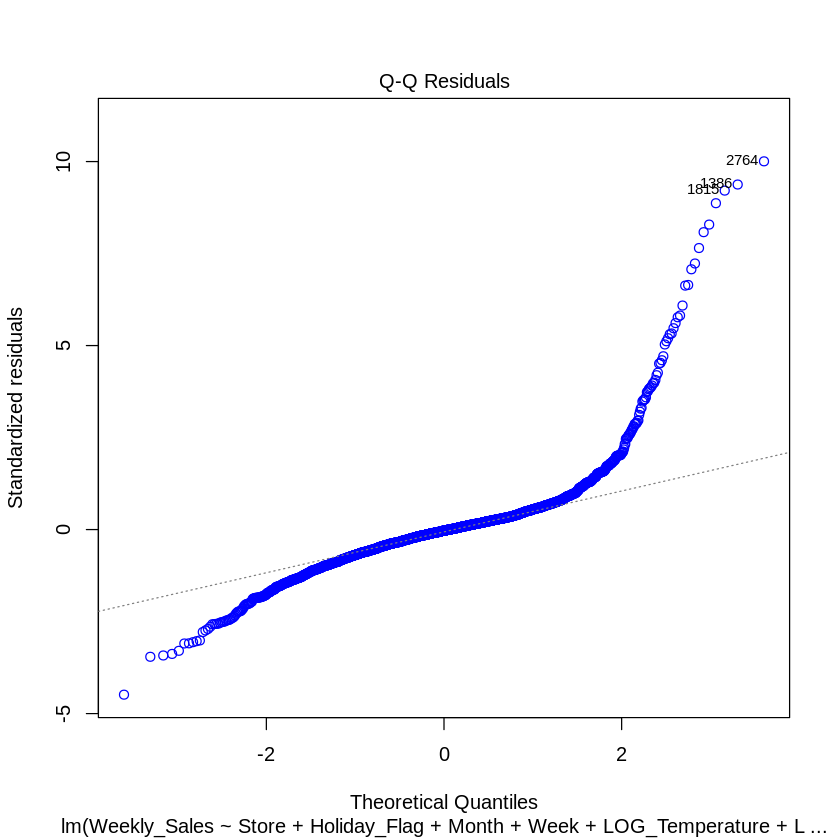

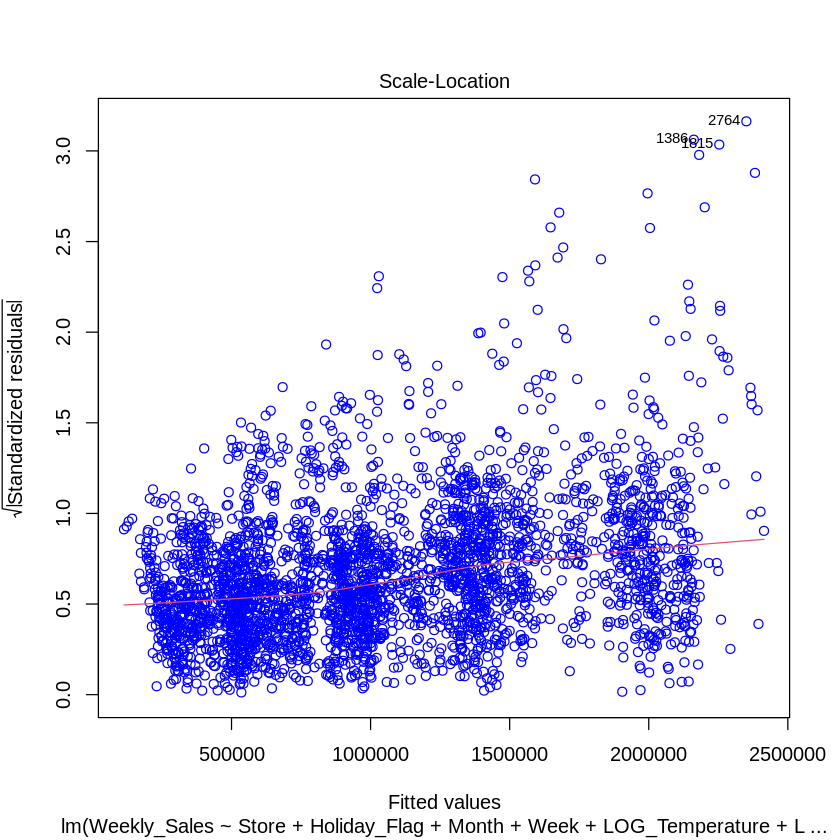

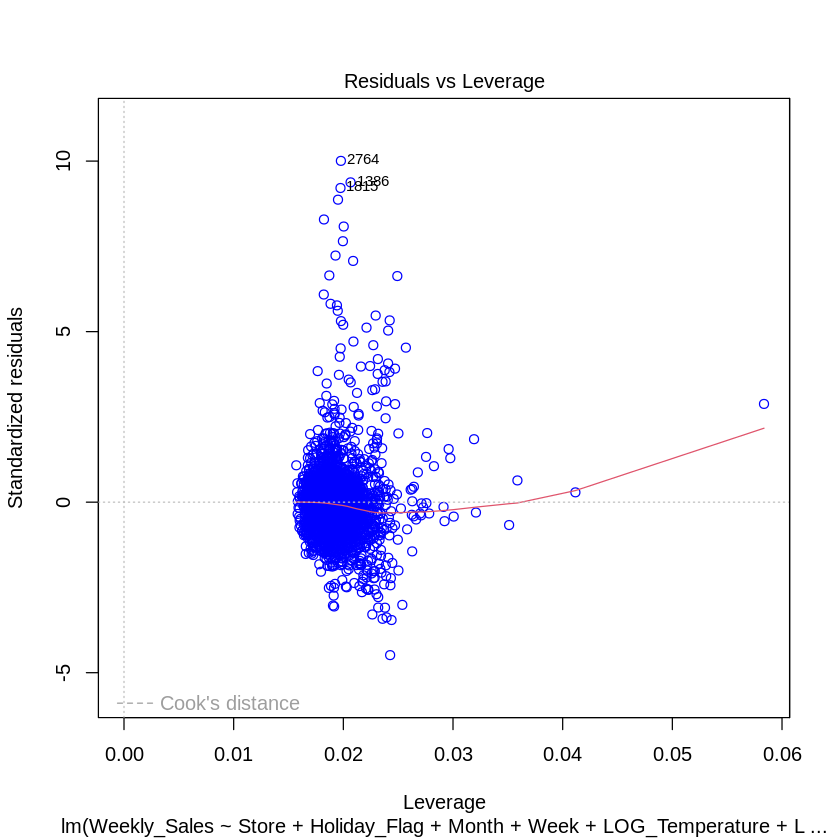

In [ ]:
# Remove the outliers
LOG_NO_OUTLIERS <- SALES

# Log Transform
LOG_NO_OUTLIERS$LOG_FuelPrice <- log(SALES$Fuel_Price)
LOG_NO_OUTLIERS$LOG_CPI <- log(SALES$CPI)
LOG_NO_OUTLIERS$LOG_Unemployment <- log(SALES$Unemployment)
LOG_NO_OUTLIERS$LOG_Temperature <- log(SALES$Temperature)

#Creating mutiplicate custom features
LOG_NO_OUTLIERS_CPI_Unemployment_Mult <- LOG_NO_OUTLIERS$LOG_CPI * LOG_NO_OUTLIERS$LOG_Unemployment
LOG_NO_OUTLIERS_Fuel_Price_Temp_Mult <- LOG_NO_OUTLIERS$LOG_FuelPrice * LOG_NO_OUTLIERS$Temperature


LOG_NO_OUTLIERS$LOG_CPI_Unemployment_Mult <- LOG_NO_OUTLIERS_CPI_Unemployment_Mult
LOG_NO_OUTLIERS$LOG_Fuel_Price_Temp_Mult <- LOG_NO_OUTLIERS_Fuel_Price_Temp_Mult

#Removing non LOG features
LOG_NO_OUTLIERS$Fuel_Price <- NULL
LOG_NO_OUTLIERS$CPI <- NULL
LOG_NO_OUTLIERS$Unemployment <- NULL

#Remove Outliers
LOG_NO_OUTLIERS <- LOG_NO_OUTLIERS[-c(1906, 1334, 1958), ]

#Split data between Training and Test
set.seed(123)
ind <- sample(2, nrow(LOG_NO_OUTLIERS), replace=T, prob= c(0.5, 0.5))
training_LOG_NO_OUTLIERS <- LOG_NO_OUTLIERS[ind == 1,]
test_LOG_NO_OUTLIERS <- LOG_NO_OUTLIERS[ind ==2,]

#Remove rows with NaN values
test_LOG_NO_OUTLIERS <- na.omit(test_LOG_NO_OUTLIERS)

# Step AIC Model
LOG_NO_OUTLIERS_model <- lm(Weekly_Sales ~ . - LOG_CPI - Date , data = training_LOG_NO_OUTLIERS)
step_LOG_NO_OUTLIERS_model <- stepAIC(LOG_NO_OUTLIERS_model, direction = "both", trace = F)
summary(step_LOG_NO_OUTLIERS_model)
AIC(step_LOG_NO_OUTLIERS_model)

#Assessment Plots
plot(step_LOG_NO_OUTLIERS_model, col = "blue")


#### Model Comparison to Full Log Model

-Removing the outliers does not appear to have had a large effect on the outcome. The "No Outlier Log" scored an R2 of 0.9384 while the full LOG model had an R2 of 0.9385.

-Our LOG features were found to be statistically significant LOG_CPI, LOG_TEMPURTRE and our custom feature LOG_CPI_Unemployment_Mult was highly significant. Quite a change from the previous log model.

-We also removed DATE and LOG_CPI due to the high VIF scores.


In [ ]:
vif(step_LOG_NO_OUTLIERS_model)

,GVIF,Df,GVIF^(1/(2*Df))
Store,34.254124,44,1.040974
Holiday_Flag,1.255415,1,1.120453
Month,899.946840,11,1.362331
Week,132.834950,1,11.525405
LOG_Temperature,9.999781,1,3.162243
LOG_CPI_Unemployment_Mult,10.541188,1,3.246720
LOG_Fuel_Price_Temp_Mult,9.135712,1,3.022534


The VIF scores are far better with only Week coming in slightly above 10.

# Model Comparison

In [ ]:
install.packages("stargazer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

library(stargazer)


# Use stargazer to create a side-by-side regression table
stargazer(step_model_1, step_LOG_NO_OUTLIERS_model, step_LOG_model, type = "text",
          title = "Regression Results", align = TRUE)



Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 





Regression Results
                                                        Dependent variable:                               
                          --------------------------------------------------------------------------------
                                                            Weekly_Sales                                  
                                     (1)                        (2)                        (3)            
----------------------------------------------------------------------------------------------------------
Store2                          414,058.900***             411,691.500***             414,296.000***      
                                 (23,982.390)               (24,276.150)               (23,955.880)       
                                                                                                          
Store3                        -1,192,073.000***          -1,171,073.000***          -1,197,757.000***     
                 

R-squared (R2): The R2 values for all three models are approximately 0.939 to 0.940, indicating that about 93.9% to 94% of the variance in Weekly_Sales is explained by the models.

F-statistic: Highly significant (p < 0.01) for all models, suggesting the models are statistically significant as a whole.

In [ ]:
# RMSE for each model
rmse_model_1 <- sqrt(mean((predict(step_model_1, newdata = test) - test$Weekly_Sales)^2))
rmse_no_outliers <- sqrt(mean((predict(step_LOG_NO_OUTLIERS_model, newdata = test_LOG_NO_OUTLIERS) - test_LOG_NO_OUTLIERS$Weekly_Sales)^2))
rmse_full_log <- sqrt(mean((predict(step_LOG_model, newdata = test_LOG) - test_LOG$Weekly_Sales)^2))

# MAE for each model
mae_model_1 <- mean(abs(predict(step_model_1, newdata = test) - test$Weekly_Sales))
mae_no_outliers <- mean(abs(predict(step_LOG_NO_OUTLIERS_model, newdata = test_LOG_NO_OUTLIERS) - test_LOG_NO_OUTLIERS$Weekly_Sales))
mae_full_log <- mean(abs(predict(step_LOG_model, newdata = test_LOG) - test_LOG$Weekly_Sales))

# R-squared for each model
model_1_fit <- lm(predict(step_model_1, newdata = test) ~ test$Weekly_Sales)
r_squared_model_1 <- summary(model_1_fit)$r.squared

no_outliers_fit <- lm(predict(step_LOG_NO_OUTLIERS_model, newdata = test_LOG_NO_OUTLIERS) ~ test_LOG_NO_OUTLIERS$Weekly_Sales)
r_squared_no_outliers <- summary(no_outliers_fit)$r.squared

full_log_fit <- lm(predict(step_LOG_model, newdata = test_LOG) ~ test_LOG$Weekly_Sales)
r_squared_full_log <- summary(full_log_fit)$r.squared

# Output results
cat("RMSE - Vanilla Model:", rmse_model_1, "\n")
cat("RMSE - No Outliers Model:", rmse_no_outliers, "\n")
cat("RMSE - Full Log Model:", rmse_full_log, "\n\n")

cat("MAE - Vanilla Model:", mae_model_1, "\n")
cat("MAE - No Outliers Model:", mae_no_outliers, "\n")
cat("MAE - Full Log Model:", mae_full_log, "\n\n")

cat("R-squared - Vanilla Model:", r_squared_model_1, "\n")
cat("R-squared - No Outliers Model:", r_squared_no_outliers, "\n")
cat("R-squared - Full Log Model:", r_squared_full_log, "\n\n")

cat("AIC - Vanilla Model:",AIC(step_model_1), "\n")
cat("AIC - No Outliers Model:", AIC(step_LOG_model), "\n")
cat("AIC - Full Log Model:", AIC(step_LOG_NO_OUTLIERS_model), "\n")


RMSE - Vanilla Model: 144079.2 
RMSE - No Outliers Model: 133388.9 
RMSE - Full Log Model: 143654.2 

MAE - Vanilla Model: 85816.16 
MAE - No Outliers Model: 83663.92 
MAE - Full Log Model: 85411.53 

R-squared - Vanilla Model: 0.9342147 
R-squared - No Outliers Model: 0.9422446 
R-squared - Full Log Model: 0.9345886 

AIC - Vanilla Model: 84444.68 
AIC - No Outliers Model: 84432.21 
AIC - Full Log Model: 84446.91 


**Root Mean Square Error (RMSE)**

The No Outliers Model has the lowest RMSE (133388.9), indicating it has the smallest average error in predicting weekly sales.

**Mean Absolute Error (MAE)**

Similar to RMSE, the No Outliers Model also has the lowest MAE (83663.92), further suggesting it makes predictions closer to the actual values on average.

**R-squared (R²)**

The No Outliers Model also has the highest R² (0.9422446), meaning it explains a higher proportion of the variance in weekly sales compared to the other models.

**Akaike Information Criterion (AIC)**

Although differences are slight, the No Outliers Model has the lowest AIC (84432.21 ), suggesting it might be the best model among the three in terms of the trade-off between goodness of fit and complexity.

Given the above analysis, the No Outliers Model appears to be the best choice. It has the highest explanatory power (R²), the lowest prediction errors (RMSE and MAE), and the lowest complexity with regards to the balance of fit and number of parameters (AIC). This model seems to strike the best balance between accuracy and simplicity, making it the preferred model for predicting weekly sales in this context.

Choosing this model would mean prioritizing accuracy in predictions while maintaining a model that's not overly complex. The improvement in model performance by removing outliers indicates that these data points might have been exerting undue leverage on the model, skewing predictions.








# Arima Vs Regression





Regression Models:


RMSE: 144079.2
MAE: 85816.16
R-squared: 0.9342
AIC: 84444.68
No Outliers Model:

RMSE: 133481.9 (Best among regression models)
MAE: 83740.64 (Best among regression models)
R-squared: 0.9422 (Best among regression models)
AIC: 84432.21 (Best among regression models)
Full Log Model:

RMSE: 143654.2
MAE: 85411.53
R-squared: 0.9346
AIC: 84444.47

ARIMA Model:
Avg_RMSE: 131693.9
Avg_MAE: 113664.1
Avg_MAPE: 11.68573
Avg_AIC: 2589.854 (not directly comparable due to different scale and data)


**Comparison and Analysis:**

**Accuracy:**

The No Outliers Model has the lowest RMSE and MAE among the regression models, suggesting it has the best forecasting accuracy for handling data without extreme values which might skew the results.
Fit Quality: The No Outliers Model also has the highest R-squared value, indicating it explains a higher percentage of the variance in sales compared to other regression models.


**Model Simplicity vs. Fit:**

Despite the AIC being the lowest in the No Outliers Model among regression approaches, it is crucial to note that AIC values are not directly comparable between ARIMA and regression models due to differences in how these models are built and their underlying assumptions.
ARIMA Performance: The ARIMA model's Avg_RMSE of 131693.9 is competitive with the best regression model (No Outliers Model), but its Avg_MAE is higher. This indicates that while ARIMA might be quite predictive, it may not be as reliable in some error metrics compared to the best regression model. The much lower AIC value in ARIMA highlights its efficiency in terms of balancing model fit and complexity but again, caution with direct comparisons.


**Recommendations and Model Selection:**

If predictive accuracy is paramount, especially in terms of minimizing error metrics like RMSE and MAE, the No Outliers Regression Model appears to be the most effective among the regression models. However, ARIMA performs comparably in RMSE and could be preferable if you're focusing on capturing time-series dynamics that regression models are not addressing.
